In [1]:
import numpy as np
import pandas as pd
from IPython.display import display


In [2]:
# List of Mizoram districts
districts = ["Aizawl", "Lunglei", "Champhai", "Kolasib", "Mamit","Serchhip", "Lawngtlai", "Saiha", "Hnahthial", "Khawzawl", "Saitual"]

# Attribute dictionaries
population = {"Aizawl": 400309, "Champhai": 125745, "Kolasib": 83955, "Lawngtlai": 117894,
              "Lunglei": 161428, "Mamit": 86364, "Saiha": 56574, "Serchhip": 64937,"Hnahthial": 28500, "Khawzawl": 28500, "Saitual": 30000}

area_size = {
    "Aizawl": 3577, "Champhai": 3185.83, "Kolasib": 1382, "Lawngtlai": 2557,
    "Lunglei": 4536, "Mamit": 3025, "Saiha": 1399, "Serchhip": 1421,
    "Hnahthial": 1133, "Khawzawl": 1152, "Saitual": 1500}

hazard_factor = {"Aizawl": 7, "Champhai": 9, "Kolasib": 6, "Lawngtlai": 8, "Lunglei": 9,
    "Mamit": 8, "Saiha": 10, "Serchhip": 7, "Hnahthial": 8, "Khawzawl": 6, "Saitual": 7}

accessibility = {
    "Aizawl": 10, "Champhai": 7, "Kolasib": 8, "Lawngtlai": 4, "Lunglei": 6,
    "Mamit": 7, "Saiha": 3, "Serchhip": 8, "Hnahthial": 5, "Khawzawl": 6, "Saitual": 7}

# Create dataframe using list comprehension
df_districts = pd.DataFrame({
    "District": districts,
    "Area_ID": list(range(1, len(districts) + 1)),
    "Population": [population[d] for d in districts],
    "Area Size": [area_size[d] for d in districts],
    "Hazard Factor": [hazard_factor[d] for d in districts],
    "Accessibility": [accessibility[d] for d in districts],
})

print(df_districts)


     District  Area_ID  Population  Area Size  Hazard Factor  Accessibility
0      Aizawl        1      400309    3577.00              7             10
1     Lunglei        2      161428    4536.00              9              6
2    Champhai        3      125745    3185.83              9              7
3     Kolasib        4       83955    1382.00              6              8
4       Mamit        5       86364    3025.00              8              7
5    Serchhip        6       64937    1421.00              7              8
6   Lawngtlai        7      117894    2557.00              8              4
7       Saiha        8       56574    1399.00             10              3
8   Hnahthial        9       28500    1133.00              8              5
9    Khawzawl       10       28500    1152.00              6              6
10    Saitual       11       30000    1500.00              7              7


In [3]:
# Display DataFrame
display(df_districts)

,District,Area_ID,Population,Area Size,Hazard Factor,Accessibility
0,Aizawl,1,400309,3577.00,7,10
1,Lunglei,2,161428,4536.00,9,6
2,Champhai,3,125745,3185.83,9,7
3,Kolasib,4,83955,1382.00,6,8
4,Mamit,5,86364,3025.00,8,7
5,Serchhip,6,64937,1421.00,7,8
6,Lawngtlai,7,117894,2557.00,8,4
7,Saiha,8,56574,1399.00,10,3
8,Hnahthial,9,28500,1133.00,8,5
9,Khawzawl,10,28500,1152.00,6,6


In [4]:
# Normalize the criteria
normalized_df = df_districts.copy()
normalized_df["Population"] = df_districts["Population"] / df_districts["Population"].max()
normalized_df["Area Size"] = df_districts["Area Size"].min() / df_districts["Area Size"]  # cost criterion
normalized_df["Hazard Factor"] = df_districts["Hazard Factor"] / df_districts["Hazard Factor"].max()
normalized_df["Accessibility"] = df_districts["Accessibility"] / df_districts["Accessibility"].max()

display(normalized_df)

,District,Area_ID,Population,Area Size,Hazard Factor,Accessibility
0,Aizawl,1,1.000000,0.316746,0.7,1.0
1,Lunglei,2,0.403258,0.249780,0.9,0.6
2,Champhai,3,0.314120,0.355637,0.9,0.7
3,Kolasib,4,0.209725,0.819826,0.6,0.8
4,Mamit,5,0.215743,0.374545,0.8,0.7
5,Serchhip,6,0.162217,0.797326,0.7,0.8
6,Lawngtlai,7,0.294507,0.443097,0.8,0.4
7,Saiha,8,0.141326,0.809864,1.0,0.3
8,Hnahthial,9,0.071195,1.000000,0.8,0.5
9,Khawzawl,10,0.071195,0.983507,0.6,0.6


In [5]:
import numpy as np
from scipy.optimize import minimize

def solve_bwm(criteria, best, worst, AB, AW):
    
    
    n = len(criteria)
    idx = {c: i for i, c in enumerate(criteria)}

    def objective(x):
        # x contains [w1, w2, ..., wn, epsilon]
        weights = x[:n]
        epsilon = x[-1]
        return epsilon

    def constraints():
        cons = []

        # Constraint: best-to-others
        for c in criteria:
            if c != best:
                i = idx[best]
                j = idx[c]
                a = AB[c]
                cons.append({'type': 'ineq', 'fun': lambda x, i=i, j=j, a=a: x[-1] - (x[i] / x[j] - a)})
                cons.append({'type': 'ineq', 'fun': lambda x, i=i, j=j, a=a: x[-1] - (a - x[i] / x[j])})

        # Constraint: others-to-worst
        for c in criteria:
            if c != worst:
                i = idx[c]
                j = idx[worst]
                a = AW[c]
                cons.append({'type': 'ineq', 'fun': lambda x, i=i, j=j, a=a: x[-1] - (x[i] / x[j] - a)})
                cons.append({'type': 'ineq', 'fun': lambda x, i=i, j=j, a=a: x[-1] - (a - x[i] / x[j])})

        # Constraint: sum of weights = 1
        cons.append({'type': 'eq', 'fun': lambda x: np.sum(x[:n]) - 1})
        
        return cons

    # Initial guess and bounds
    x0 = np.ones(n + 1) / (n + 1)
    bounds = [(0.001, 1)] * n + [(0, 10)]  # weights in (0,1], epsilon >= 0

    result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=constraints())

    if result.success:
        weights = result.x[:n]
        return {criteria[i]: round(w, 4) for i, w in enumerate(weights)}
    else:
        raise ValueError("BWM optimization failed: " + result.message)


# === Example usage ===
criteria = ["Population", "Area Size", "Hazard Factor", "Accessibility"]
best = "Hazard Factor"
worst = "Area Size"

# Best-to-Others (Hazard Factor over others)
AB = {
    "Population": 4,
    "Area Size": 6,
    "Hazard Factor": 1,
    "Accessibility": 3
}


# Others-to-Worst (Others over Area Size)
AW = {
    "Population": 3,
    "Area Size": 1,
    "Hazard Factor": 7,
    "Accessibility": 5,
}

# Solve and print results
weights = solve_bwm(criteria, best, worst, AB, AW)
print("Optimal BWM Weights:")
for c, w in weights.items():
    print(f"{c}: {w}")
import warnings
warnings.filterwarnings("ignore", message="Values in x were outside bounds*")


Optimal BWM Weights:
Population: 0.1362
Area Size: 0.072
Hazard Factor: 0.5144
Accessibility: 0.2774


In [6]:
    # WASPAS Method
    # Weighted Sum Model (WSM)
wsm_scores = np.dot(normalized_df[weights.keys()], list(weights.values()))
    
    # Weighted Product Model (WPM)
wpm_scores = np.prod(np.power(normalized_df[weights.keys()], list(weights.values())), axis=1)
    
    # Combine both with λ = 0.5
waspas_scores = 0.5 * wsm_scores + 0.5 * wpm_scores
    
    # Attach results to original dataframe
df_districts["WASPAS_Score"] = waspas_scores
df_districts["Rank"] = df_districts["WASPAS_Score"].rank(ascending=False).astype(int)
    
    # Sort by rank and display
df_districts = df_districts.sort_values(by="Rank")
display(df_districts)

,District,Area_ID,Population,Area Size,Hazard Factor,Accessibility,WASPAS_Score,Rank
0,Aizawl,1,400309,3577.00,7,10,0.781367,1
2,Champhai,3,125745,3185.83,9,7,0.702890,2
1,Lunglei,2,161428,4536.00,9,6,0.679851,3
4,Mamit,5,86364,3025.00,8,7,0.636324,4
5,Serchhip,6,64937,1421.00,7,8,0.631177,5
7,Saiha,8,56574,1399.00,10,3,0.607730,6
3,Kolasib,4,83955,1382.00,6,8,0.597058,7
6,Lawngtlai,7,117894,2557.00,8,4,0.573286,8
8,Hnahthial,9,28500,1133.00,8,5,0.572594,9
10,Saitual,11,30000,1500.00,7,7,0.569012,10


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [8]:
# 1. Generate synthetic earthquake patient data
# ----------------------------
np.random.seed(42)
n_samples = 1000

# Step 1: Generate base variables
ages = np.clip(np.random.normal(loc=40, scale=15, size=n_samples).astype(int), 1, 90)
genders = np.random.choice([0, 1], size=n_samples)  # 0: Female, 1: Male

# Step 2: Dependent features
fractures = np.random.binomial(1, p=np.clip((ages - 30) / 100, 0.1, 0.9))
bleeding = np.random.binomial(1, p=0.3 + fractures * 0.3)
consciousness = np.random.binomial(1, p=1 - bleeding * 0.5)
mobility = np.random.binomial(1, p=1 - fractures * 0.6)
pulse_rate = np.clip((70 + bleeding * 20 - consciousness * 10  + (ages - 40) * 0.2).astype(int), 50, 160)
pregnancy = np.array([
    np.random.binomial(1, p=0.15) if (genders[i] == 0 and 20 <= ages[i] <= 60) else 0
    for i in range(n_samples)
])

# Step 3: Independent features

trapped_duration = np.random.randint(0, 12, size=n_samples)
blood_pressure = np.clip((ages * 1.5 + np.random.normal(80, 15, n_samples)).astype(int), 80, 180)

# Step 4: Construct DataFrame
patient_data = pd.DataFrame({
    "Age": ages,
    "Gender": genders,
    "Pregnancy_Status": pregnancy,
    "Consciousness_Level": consciousness,
    "Severe_Bleeding": bleeding,
    "Fractures": fractures,
    "Pulse_Rate": pulse_rate,
    "Mobility": mobility,
    "Trapped_Duration_Hours": trapped_duration,
    "Blood_Pressure": blood_pressure
})

display(patient_data)


,Age,Gender,Pregnancy_Status,Consciousness_Level,Severe_Bleeding,Fractures,Pulse_Rate,Mobility,Trapped_Duration_Hours,Blood_Pressure
0,47,0,0,1,0,0,61,1,6,166
1,37,1,0,1,0,0,59,1,4,113
2,49,0,1,0,1,0,91,1,1,160
3,62,1,0,1,0,0,64,1,10,169
4,36,0,1,1,0,1,59,0,5,124
...,...,...,...,...,...,...,...,...,...,...
995,35,1,0,1,1,1,79,1,0,133
996,66,0,0,1,0,0,65,1,2,180
997,49,1,0,0,1,0,91,1,2,138
998,31,0,0,1,0,0,58,1,0,124


In [9]:
# ----------------------------
# 2. Simulate target: Patient Condition Severity
# ----------------------------
def assign_condition(row):
    score = 0
    if row["Age"] < 10 or row["Age"] > 50:
        score += 2
    if row["Gender"] == 0:
        score += 1
    if row["Pregnancy_Status"] == 1:
        score += 2
    if row["Consciousness_Level"] == 0:
        score += 2
    if row["Severe_Bleeding"] == 1:
        score += 2
    if row["Fractures"] == 1:
        score += 2
    if row["Pulse_Rate"] > 120 or row["Pulse_Rate"] < 50:
        score += 2
    if row["Mobility"] == 0:
        score += 2
    if row["Trapped_Duration_Hours"] > 5:
        score += 1

    if score >= 8:
        return "Very High"
    elif score >= 6:
        return "High"
    elif score >= 4:
        return "Medium"
    elif score >= 2:
        return "Low"
    else:
        return "Very Low"
        
severity_map = {
    "Very Low": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Very High": 4
}
patient_data["Condition_Label"] = patient_data["Condition"].map(severity_map)
patient_data["Condition"] = patient_data.apply(assign_condition, axis=1)


In [10]:
# Assign area randomly
np.random.seed(42)
patient_data["Area"] = np.random.randint(0, 7, size=len(patient_data))  # 7 areas: 0 to 6
# Show first 20 rows nicely formatted
patient_data.head(20)



,Age,Gender,Pregnancy_Status,Consciousness_Level,Severe_Bleeding,Fractures,Pulse_Rate,Mobility,Trapped_Duration_Hours,Blood_Pressure,Condition,Condition_Label,Area
0,47,0,0,1,0,0,61,1,6,166,Low,1,6
1,37,1,0,1,0,0,59,1,4,113,Very Low,0,3
2,49,0,1,0,1,0,91,1,1,160,High,3,4
3,62,1,0,1,0,0,64,1,10,169,Low,1,6
4,36,0,1,1,0,1,59,0,5,124,High,3,2
5,36,0,0,1,1,0,79,1,9,136,Medium,2,4
6,63,0,0,1,1,0,84,1,2,175,Medium,2,4
7,51,0,0,1,1,0,82,1,3,144,Medium,2,6
8,32,1,0,1,0,0,58,1,9,115,Very Low,0,1
9,48,0,0,1,1,0,81,1,11,128,Medium,2,2


In [11]:
patient_data.to_excel('patient_data.xlsx', index=False)


In [12]:
print(patient_data["Condition_Label"].value_counts())


Condition_Label
0    342
1    274
2    210
3    103
4     71
Name: count, dtype: int64


In [13]:
# ----------------------------
# 3. Prepare features and target
# ----------------------------
X = patient_data.drop(columns=["Condition", "Condition_Label", "Area"])
y = patient_data["Condition_Label"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 4. Train Decision Tree
# ----------------------------
dt_model = DecisionTreeClassifier(criterion='gini',random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)

# 6. Evaluation
# ----------------------------
target= ["Very low", "Low", "Medium", "High", "Very High"]
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_preds,target_names=target, zero_division=0))


Decision Tree Classification Report:
              precision    recall  f1-score   support

    Very low       1.00      1.00      1.00        79
         Low       0.98      1.00      0.99        54
      Medium       0.97      0.94      0.96        36
        High       0.94      0.70      0.80        23
   Very High       0.57      1.00      0.73         8

    accuracy                           0.95       200
   macro avg       0.89      0.93      0.90       200
weighted avg       0.97      0.95      0.96       200



In [14]:
# ----------------------------
# 4A. Train Support Vector Classifier
# ----------------------------
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)

# ----------------------------
# Evaluation - SVC
# ----------------------------
print("\nSupport Vector Classifier Report:")
print(classification_report(y_test, svc_preds, target_names=target, zero_division=0))



Support Vector Classifier Report:
              precision    recall  f1-score   support

    Very low       0.98      1.00      0.99        79
         Low       0.88      0.93      0.90        54
      Medium       0.80      0.78      0.79        36
        High       0.88      0.65      0.75        23
   Very High       0.70      0.88      0.78         8

    accuracy                           0.90       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.90      0.90      0.89       200



In [15]:
# ----------------------------
# 4B. Train Logistic Regression
# ----------------------------
lr_model = LogisticRegression( solver='lbfgs', max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

# ----------------------------
# Evaluation - Logistic Regression
# ----------------------------
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_preds, target_names=target, zero_division=0))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Very low       0.83      0.95      0.89        79
         Low       0.77      0.69      0.73        54
      Medium       0.79      0.75      0.77        36
        High       0.83      0.65      0.73        23
   Very High       0.70      0.88      0.78         8

    accuracy                           0.81       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.80      0.81      0.80       200



In [16]:
# ----------------------------
# 4C. Train K-Nearest Neighbors Classifier
# ----------------------------
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune k later
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)
# ----------------------------
# Evaluation - KNN
# ----------------------------
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_preds, target_names=target, zero_division=0))



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    Very low       0.97      0.96      0.97        79
         Low       0.89      0.89      0.89        54
      Medium       0.78      0.89      0.83        36
        High       0.88      0.65      0.75        23
   Very High       0.70      0.88      0.78         8

    accuracy                           0.89       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.89      0.89      0.89       200



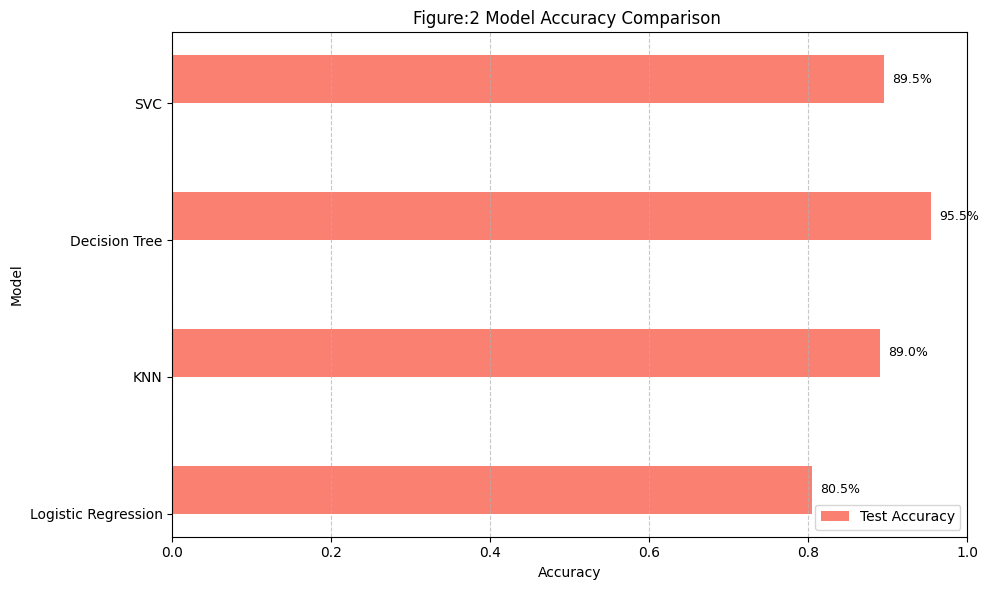

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracy values
models = ["Logistic Regression", "KNN", "Decision Tree", "SVC"]

test_accuracies = [
    lr_model.score(X_test_scaled, y_test),
    knn_model.score(X_test_scaled, y_test),
    dt_model.score(X_test_scaled, y_test),
    svc_model.score(X_test_scaled, y_test)
]

# Bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Plot horizontal bars
plt.figure(figsize=(10, 6))
plt.barh(index + bar_width, test_accuracies, bar_width, label="Test Accuracy", color='salmon')

# Add labels
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.yticks(index + bar_width / 2, models)
plt.title("Figure:2 Model Accuracy Comparison ")
plt.legend()
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Optional: Add value labels
for i in range(len(models)):
    plt.text(test_accuracies[i] + 0.01, i + bar_width, f"{test_accuracies[i]*100:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.savefig("model_accuracy.png", dpi=300, bbox_inches='tight')
plt.show()


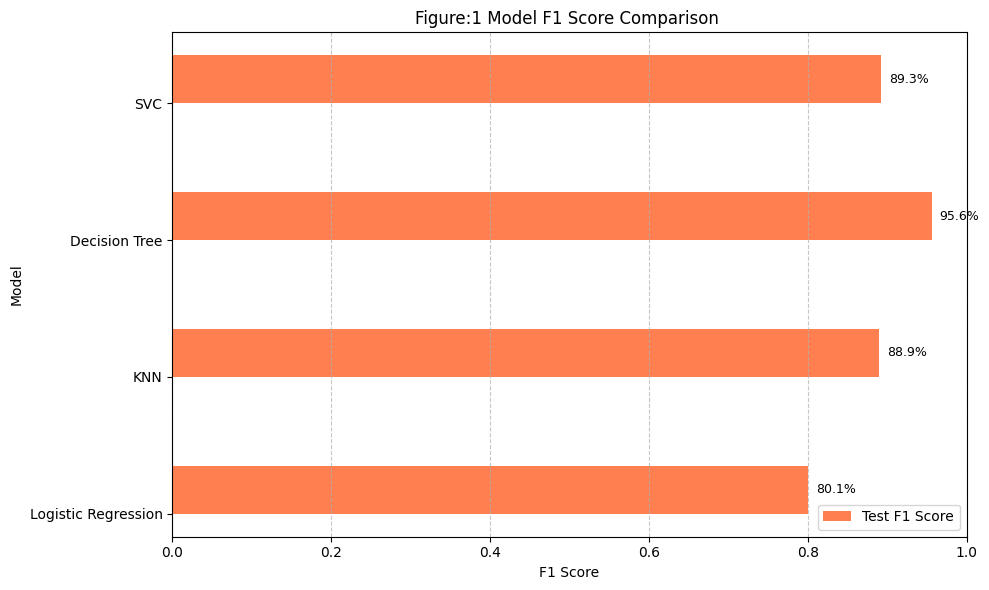

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Model names
models = ["Logistic Regression", "KNN", "Decision Tree", "SVC"]

# Predict on training and test sets
lr_train_preds = lr_model.predict(X_train_scaled)
knn_train_preds = knn_model.predict(X_train_scaled)
dt_train_preds = dt_model.predict(X_train_scaled)
svc_train_preds = svc_model.predict(X_train_scaled)

lr_test_preds = lr_model.predict(X_test_scaled)
knn_test_preds = knn_model.predict(X_test_scaled)
dt_test_preds = dt_model.predict(X_test_scaled)
svc_test_preds = svc_model.predict(X_test_scaled)

# Compute F1 scores (weighted average for multiclass)

test_f1_scores = [
    f1_score(y_test, lr_test_preds, average='weighted'),
    f1_score(y_test, knn_test_preds, average='weighted'),
    f1_score(y_test, dt_test_preds, average='weighted'),
    f1_score(y_test, svc_test_preds, average='weighted')
]

# Plot
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.barh(index + bar_width, test_f1_scores, bar_width, label="Test F1 Score", color='coral')

plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.yticks(index + bar_width / 2, models)
plt.title("Figure:1 Model F1 Score Comparison ")
plt.legend()
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add F1 value labels
for i in range(len(models)):
    plt.text(test_f1_scores[i] + 0.01, i + bar_width, f"{test_f1_scores[i]*100:.1f}%", va='center', fontsize=9)

plt.tight_layout()
plt.savefig("model_f1.png", dpi=300, bbox_inches='tight')
plt.show()


# Test Problems
1.Generating patients


In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


area_id_to_name = {
    1: "Aizawl",
    2: "Lunglei",
    3: "Champhai",
    4: "Kolasib",
    5: "Mamit",
    6: "Serchhip",
    7: "Lawngtlai",
    8: "Saiha",
    9: "Hnahthial",
    10: "Khawzawl",
    11: "Saitual"
}
area_rank = {
    'Aizawl': 1,
    'Champhai': 2,
    'Lunglei': 3,
    'Mamit': 4,
    'Serchhip': 5,
    'Saiha': 6,
    'Kolasib': 7,
    'Lawngtlai': 8,
    'Hnahthial': 9,
    'Saitual': 10,
    'Khawzawl': 11

}

In [20]:
def generate_patient_inputs(n_patients, scaler, dt_model, area_id_to_name, area_rank,seed=42):
    np.random.seed(seed)

    # Step 1: Base features
    ages = np.clip(np.random.normal(loc=40, scale=15, size=n_patients).astype(int), 1, 90)
    genders = np.random.choice([0, 1], size=n_patients)  # 0: Female, 1: Male

    # Step 2: Dependent features
    fractures = np.random.binomial(1, p=np.clip((ages - 30) / 100, 0.1, 0.9))
    bleeding = np.random.binomial(1, p=0.3 + fractures * 0.3)
    consciousness = np.random.binomial(1, p=1 - bleeding * 0.5)
    mobility_prob = np.clip(1 - (0.5 * fractures + 0.4 * (1 - consciousness) + 0.3 * fractures * (1 - consciousness)), 0, 1)
    mobility = np.random.binomial(1, p=mobility_prob)
    pulse_rate = np.clip((70 + bleeding * 20 - consciousness * 10 + (ages - 40) * 0.2).astype(int), 50, 160)
    pregnancy = np.array([
        np.random.binomial(1, p=0.15) if (genders[i] == 0 and 20 <= ages[i] <= 60) else 0
        for i in range(n_patients)
    ])

    # Step 3: Independent features
    trapped_duration = np.random.randint(1, 13, size=n_patients)
    blood_pressure = np.clip((ages * 1.5 + np.random.normal(80, 15, n_patients)).astype(int), 80, 180)
    area = np.random.randint(1, 9, size=n_patients)  # Assuming 7 areas

    # Combine into DataFrame
    new_data = pd.DataFrame({
        "Age": ages,
        "Gender": genders,
        "Pregnancy_Status": pregnancy,
        "Consciousness_Level": consciousness,
        "Severe_Bleeding": bleeding,
        "Fractures": fractures,
        "Pulse_Rate": pulse_rate,
        "Mobility": mobility,
        "Trapped_Duration_Hours": trapped_duration,
        "Blood_Pressure": blood_pressure,
        "Area": area
    })

    # Prepare data for prediction
    X_new = new_data.drop(columns=["Area"])
    X_new_scaled = scaler.transform(X_new)

    # Predict severity using your trained model
    
    new_data["Condition_Label"] = dt_model.predict(X_new_scaled)
    new_data["AreaName"] = new_data["Area"].map(area_id_to_name)
    


    # Count patients per area
    Fm = new_data.groupby("AreaName").size().to_dict()

    # Fill missing areas with 0
    for area in area_id_to_name.values():
        if area not in Fm:
            Fm[area] = 0

    return new_data, Fm

In [21]:
synthetic,fm=generate_patient_inputs(100, scaler, dt_model, area_id_to_name, area_rank,42)



print(synthetic["Condition_Label"].value_counts())


Condition_Label
0    34
1    32
2    16
3     9
4     9
Name: count, dtype: int64


In [22]:
# Step 1: Create a list to store the test problem data
test_problems = []

# Step 2: Loop over increasing number of patients (3,7,11....)
for i,n_patients in enumerate(range(3, 40, 4)):
    
    new_data, Fm = generate_patient_inputs(
        n_patients=n_patients,
        scaler=scaler,
        dt_model=dt_model,
        area_id_to_name=area_id_to_name,
        area_rank=area_rank,
        seed=100 + i  # ← reproducible and different
    )
    test_problems.append({
        "n_patients": n_patients,
        "patient_data": new_data,
        "Fm": Fm
    })
    
new_data["AreaName"] = new_data["Area"].map(area_id_to_name)



In [23]:

for test_case in test_problems:
    if test_case["n_patients"] == 19:
        selected_data = test_case["patient_data"]
        selected_Fm = test_case["Fm"]
        break

# Now you can inspect the contents
print("Patient Data (n=15):")
print(selected_data)

print("\nMinimum Rescuers Fm for each Area:")
print(selected_Fm)


Patient Data (n=15):
    Age  Gender  Pregnancy_Status  Consciousness_Level  Severe_Bleeding  \
0    33       0                 0                    0                1   
1    31       0                 0                    1                0   
2    30       0                 0                    0                1   
3    53       0                 0                    1                0   
4    48       1                 0                    1                1   
5    30       1                 0                    1                0   
6    72       1                 0                    0                1   
7    36       0                 0                    1                1   
8    35       1                 0                    0                1   
9    41       1                 0                    1                0   
10   54       0                 0                    1                0   
11   31       0                 0                    0                1   
12  

In [24]:
import dataframe_image as dfi

for problem in test_problems:
    if problem["n_patients"] == 31:
        df = problem["patient_data"]
        display(df)
        df.to_excel("patient_data_n31.xlsx", index=False)  # Save as PNG image
        break


,Age,Gender,Pregnancy_Status,Consciousness_Level,Severe_Bleeding,Fractures,Pulse_Rate,Mobility,Trapped_Duration_Hours,Blood_Pressure,Area,Condition_Label,AreaName
0,47,0,1,1,0,0,61,1,5,133,7,1,Lawngtlai
1,30,0,1,0,1,0,88,0,9,133,4,4,Kolasib
2,17,0,0,1,0,0,55,1,7,80,4,1,Kolasib
3,45,0,1,1,1,0,81,1,5,176,3,2,Champhai
4,25,0,0,1,0,0,57,1,7,91,1,1,Aizawl
5,33,0,1,1,0,0,58,1,5,139,3,1,Champhai
6,34,1,0,1,0,0,58,1,9,138,6,0,Serchhip
7,38,1,0,1,0,0,59,1,5,132,4,0,Kolasib
8,48,1,0,1,0,0,61,1,9,180,2,0,Lunglei
9,18,0,0,1,0,1,55,0,11,108,4,3,Kolasib


In [25]:
from IPython.display import display
import dataframe_image as dfi

# Find the test problem for n_patients = 15
for problem in test_problems:
    if problem["n_patients"] == 31:
        display(problem["patient_data"]) 
        break


,Age,Gender,Pregnancy_Status,Consciousness_Level,Severe_Bleeding,Fractures,Pulse_Rate,Mobility,Trapped_Duration_Hours,Blood_Pressure,Area,Condition_Label,AreaName
0,47,0,1,1,0,0,61,1,5,133,7,1,Lawngtlai
1,30,0,1,0,1,0,88,0,9,133,4,4,Kolasib
2,17,0,0,1,0,0,55,1,7,80,4,1,Kolasib
3,45,0,1,1,1,0,81,1,5,176,3,2,Champhai
4,25,0,0,1,0,0,57,1,7,91,1,1,Aizawl
5,33,0,1,1,0,0,58,1,5,139,3,1,Champhai
6,34,1,0,1,0,0,58,1,9,138,6,0,Serchhip
7,38,1,0,1,0,0,59,1,5,132,4,0,Kolasib
8,48,1,0,1,0,0,61,1,9,180,2,0,Lunglei
9,18,0,0,1,0,1,55,0,11,108,4,3,Kolasib


In [26]:
patient_data.to_excel('patient_data.xlsx', index=False)


In [27]:
print(severity_map)

{'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}


# Z1

In [28]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import pandas as pd

def weighted_patient_coordinates(n_patients, area_rank, district_coords):

    # Invert rank to weight: weight ∝ 1/rank
    weights = np.array([1 / area_rank[name] for name in area_rank])
    weights = weights / weights.sum()
    areas = list(area_rank.keys())
    
    chosen_areas = np.random.choice(areas, size=n_patients, p=weights)
    coords = []
    for area in chosen_areas:
        lat0, lon0 = district_coords[area]
        # scatter within ~5km (~0.05°)
        lat = lat0 + np.random.uniform(-0.05, 0.05)
        lon = lon0 + np.random.uniform(-0.05, 0.05)
        coords.append((area, lat, lon))
    return coords

def assign_severity(n):
    # Randomly assign severity for demo; replace with your model prediction
    choices = ["Very Low","Low","Medium","High","Very High"]
    probs = [0.2,0.3,0.25,0.15,0.1]
    return list(np.random.choice(choices, size=n, p=probs))

# 1. Parameters
n_rcs = 4
n_patients = 30

area_rank = {
    "Aizawl": 1, "Champhai": 2, "Lunglei": 3, "Mamit": 4,
    "Serchhip": 5, "Saiha": 6, "Kolasib": 7, "Lawngtlai": 8,
    "Hnahthial": 9, "Khawzawl": 10, "Saitual": 11
}
district_coords = {
    "Aizawl": (23.748659, 92.728016),
    "Lunglei": (22.867069, 92.765533),
    "Champhai": (23.468004, 93.311614),
    "Kolasib": (24.223880, 92.678690),
    "Mamit": (23.784920, 92.469390),
    "Serchhip": (23.281720, 92.900390),
    "Lawngtlai": (22.530000, 92.900000),
    "Saiha": (22.489735, 92.979271),
    "Hnahthial": (23.132270, 93.065320),
    "Khawzawl": (23.316670, 92.750000),
    "Saitual": (23.810340, 92.652260)
}
rc_city_coords = {
    0: ("Aizawl", (23.7271, 92.7176)),
    1: ("Lunglei", (22.8804, 92.7332)),
    2: ("Champhai", (23.4562, 93.3280)),
    3: ("Lawngtlai", (22.5160, 92.9042))
}

# 2. Generate patients
coords = weighted_patient_coordinates(n_patients, area_rank, district_coords)
severities = assign_severity(n_patients)

patients = []
for i, ((area, lat, lon), sev) in enumerate(zip(coords, severities), 1):
    patients.append({
        "id": f"P{i:03d}",
        "district": area,
        "lat": lat,
        "lon": lon,
        "severity": sev
    })

# 3. Relief centers
relief_centers = [
    {"id":"RC1","name":"Relief Center Aizawl","lat":23.7271,"lon":92.7176},
    {"id":"RC2","name":"Relief Center Lunglei","lat":22.8804,"lon":92.7332},
    {"id":"RC3","name":"Relief Center Champhai","lat":23.4562,"lon":93.3280},
    {"id":"RC4","name":"Relief Center Lawngtlai","lat":22.5160,"lon":92.9042},
]

# 4. Severity to color
severity_colors = {
    "Very Low":"green","Low":"lightblue",
    "Medium":"orange","High":"red","Very High":"darkred"
}

In [29]:
# 5. Create map
m = folium.Map(location=[23.3, 92.8], zoom_start=8, tiles="CartoDB positron")

# Patient cluster
patient_cluster = MarkerCluster().add_to(m)
for p in patients:
    folium.Marker(
        location=[p["lat"], p["lon"]],
        popup=f"ID: {p['id']}<br>District: {p['district']}<br>Severity: {p['severity']}",
        icon=folium.Icon(color=severity_colors[p["severity"]], icon="user", prefix="glyphicon")
    ).add_to(patient_cluster)

# Relief centers
for rc in relief_centers:
    folium.Marker(
        location=[rc["lat"], rc["lon"]],
        popup=f"{rc['id']}: {rc['name']}",
        icon=folium.Icon(color="blue", icon="plus-sign", prefix="glyphicon")
    ).add_to(m)

# 6. Save
m.save("mizoram_weighted_case_study.html")
print("Map saved as mizoram_weighted_case_study.html")

Map saved as mizoram_weighted_case_study.html


In [30]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import pandas as pd

# ---------- Helper Functions ----------

def weighted_patient_coordinates(n_patients, area_rank, district_coords):
    weights = np.array([1/area_rank[name] for name in area_rank])
    weights /= weights.sum()
    areas = list(area_rank.keys())
    chosen = np.random.choice(areas, size=n_patients, p=weights)
    coords = []
    for area in chosen:
        lat0, lon0 = district_coords[area]
        coords.append((
            area,
            lat0 + np.random.uniform(-0.05, 0.05),
            lon0 + np.random.uniform(-0.05, 0.05)
        ))
    return coords

def assign_severity(n):
    choices = ["Very Low","Low","Medium","High","Very High"]
    probs   = [0.2,       0.3,    0.25,   0.15,   0.1]
    return list(np.random.choice(choices, size=n, p=probs))

# ---------- Parameters ----------

n_patients = 30

area_rank = {
    "Aizawl": 1, "Champhai": 2, "Lunglei": 3, "Mamit": 4,
    "Serchhip":5, "Saiha":6, "Kolasib":7, "Lawngtlai":8,
    "Hnahthial":9, "Khawzawl":10,"Saitual":11
}

district_coords = {
    "Aizawl": (23.748659, 92.728016),
    "Lunglei": (22.867069, 92.765533),
    "Champhai":(23.468004, 93.311614),
    "Kolasib":(24.223880, 92.678690),
    "Mamit":  (23.784920, 92.469390),
    "Serchhip":(23.281720,92.900390),
    "Lawngtlai":(22.530000,92.900000),
    "Saiha": (22.489735, 92.979271),
    "Hnahthial":(23.132270,93.065320),
    "Khawzawl": (23.316670,92.750000),
    "Saitual":  (23.810340,92.652260)
}

relief_centers = [
    {"id":"RC1","name":"Relief Center Aizawl","lat":23.7271,"lon":92.7176},
    {"id":"RC2","name":"Relief Center Lunglei","lat":22.8804,"lon":92.7332},
    {"id":"RC3","name":"Relief Center Champhai","lat":23.4562,"lon":93.3280},
    {"id":"RC4","name":"Relief Center Lawngtlai","lat":22.5160,"lon":92.9042},
]

severity_colors = {
    "Very Low":"green","Low":"lightblue",
    "Medium":"orange","High":"red","Very High":"darkred"
}

# ---------- Generate Patients ----------

coords = weighted_patient_coordinates(n_patients, area_rank, district_coords)
severities = assign_severity(n_patients)

patients = [{
    "id": f"P{i+1:03d}",
    "district": area, "lat": lat, "lon": lon,
    "severity": sev
} for i, ((area, lat, lon), sev) in enumerate(zip(coords, severities))]

# ---------- Map #1: Patients Only ----------

m1 = folium.Map(location=[23.3, 92.8], zoom_start=8, tiles="CartoDB positron")
cluster = MarkerCluster().add_to(m1)

for p in patients:
    folium.Marker(
        location=[p["lat"], p["lon"]],
        popup=f"ID: {p['id']}<br>District: {p['district']}<br>Severity: {p['severity']}",
        icon=folium.Icon(color=severity_colors[p["severity"]],
                         icon="user", prefix="glyphicon")
    ).add_to(cluster)

m1.save("mizoram_patients_map.html")
print("✓ mizoram_patients_map.html (patients only) saved")

# ---------- Map #2: Relief Centers Only ----------

m2 = folium.Map(location=[23.3, 92.8], zoom_start=8, tiles="CartoDB positron")

for rc in relief_centers:
    folium.Marker(
        location=[rc["lat"], rc["lon"]],
        popup=f"{rc['id']}: {rc['name']}",
        icon=folium.Icon(color="blue",
                         icon="plus-sign", prefix="glyphicon")
    ).add_to(m2)

m2.save("mizoram_relief_centers_map.html")
print("✓ mizoram_relief_centers_map.html (relief centers only) saved")


✓ mizoram_patients_map.html (patients only) saved
✓ mizoram_relief_centers_map.html (relief centers only) saved


In [31]:
import pyomo.environ as pe
from pyomo.environ import SolverFactory, value
from collections import Counter


def run_z1_for_optimization(ns_value, new_data, df_districts,loc):
    np.random.seed(42)
    
    n_rcs = 4
    n_patients = new_data.shape[0]

    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}

    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()
    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    # Full state coverage for patient coordinates (within Mizoram bounds)
    patient_coords = {j: (np.random.uniform(22.5, 24.5), np.random.uniform(92.3, 93.5) )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

    training_cost_dict = {0: 2000, 1: 1300, 2: 1500, 3: 1600}
    vehicle_cost_dict = {0: 2000, 1: 1300}
    activation_cost_dict = {0: 20000, 1: 15000, 2: 10000, 3: 10000}
    vehicle_capacity_dict = {0: 2, 1: 1}
    rescuer_limit = 4000
    B = 500000

    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }
    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)
                 for i in range(n_rcs) for j in range(n_patients)}

    base_profile = {0: 1, 1: 1, 2: 2, 3: 2, 4: 3}

    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0, 1])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)
    model.R = pe.Var(model.J, domain=pe.NonNegativeIntegers)

    # Parameters
    model.A = pe.Param(model.I, initialize=training_cost_dict)
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)
    model.Lb = pe.Param(initialize=1)
    model.Ub = pe.Param(initialize=4)
    model.B = pe.Param(initialize=B)
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)
    base_profile = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}

    # Scale this profile based on overall Ns level
    Ns_scaled = {s: ns_value * base_profile[s] for s in base_profile}
    model.Ns = pe.Param(model.S, initialize=Ns_scaled)


    # === Constraints ===
    #17
    def area_demand_rule(model, m):
        if value(model.Fm[m]) == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
               for i in model.I for j in model.J if model.AreaOf[j] == m
               for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)
    #18
    def active_rc_bound(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)
    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound)
    #19
    def budget_limit(model):
        return (
            sum(model.A[i] * model.Q[i, m] for i in model.I for m in model.M) +
            sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L) +
            sum(model.Y[i] * model.CA[i] for i in model.I)
        ) <= model.B
    model.BudgetConstraint = pe.Constraint(rule=budget_limit)
    #21
    def assign_once(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=assign_once)

    
    #22
    def rescuers_for_each_patient(model, j):
        s = model.SeverityOf[j]
        return model.R[j] == model.Ns[s] * sum(model.X[i, j, o, m, s, l]
                                           for i in model.I for o in model.O for m in model.M for l in model.L)
    model.PatientLevelRescuers = pe.Constraint(model.J, rule=rescuers_for_each_patient)

    #24
    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)
    #b
    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)
    #20
    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    # Generate allowed RCs per patient based on distance
    allowed_rcs_per_patient = {
        j: set(i for i, _ in sorted(
            [(i, dist_dict[i, j]) for i in range(n_rcs)],
            key=lambda x: x[1]
        )[:3])  # Top-3 nearest RCs
        for j in range(n_patients)}


    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip

    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)

    # === Objective Z1 ===
    model.z1 = pe.Objective(expr=sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * model.Ns[s]
                                     for i in model.I for j in model.J for o in model.O
                                     for m in model.M for s in model.S for l in model.L), sense=pe.minimize)
    # === Solve ===
    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)
    if (result.solver.status != pe.SolverStatus.ok) or (result.solver.termination_condition != pe.TerminationCondition.optimal):
        print(f"Solver failed for Ns = {ns_value}")
        return None
    #print(f"--- Rescuers per Patient for Ns = {ns_value} ---")
    #for j in model.J:
        #print(f"Patient {j}: Severity {value(model.SeverityOf[j])}, Rescuers = {value(model.R[j])}")
    #total_rescuers = sum(value(model.Q[i, m]) for i in model.I for m in model.M)
    #print(f"Total Rescuers Used = {int(total_rescuers)}")
    #assigned_patients = sum(1 for j in model.J if value(model.R[j]) > 0)
    #print(f"Number of Patients Rescued = {assigned_patients}")

    return value(model.z1)


Running for Nₛ = 1
Running for Nₛ = 2
Running for Nₛ = 3
Running for Nₛ = 4
Running for Nₛ = 5
Running for Nₛ = 6
Running for Nₛ = 7


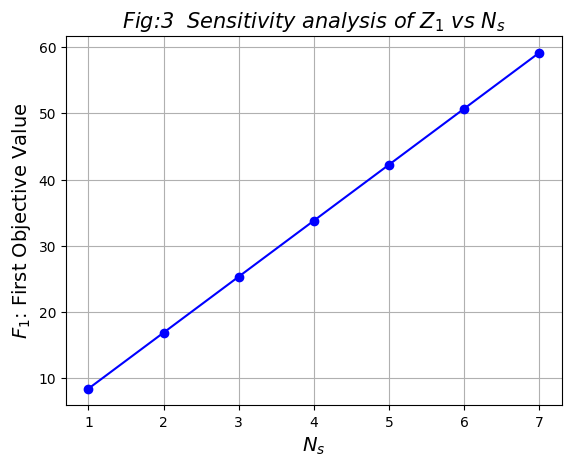

In [32]:

ns_range = range(1, 8)
z1_values = []

per_patient = new_data.sample(n=5, random_state=49).reset_index(drop=True)
for ns in ns_range:
    print(f"Running for Nₛ = {ns}")
    z1 = run_z1_for_optimization(ns, per_patient, df_districts,loc=1)
    if z1 is None:
        z1 = float("nan")  
    z1_values.append(z1)



import matplotlib.pyplot as plt

plt.plot(ns_range, z1_values, marker='o', linestyle='-', color='blue')
plt.xlabel(r'$N_s$', fontsize=14)
plt.ylabel(r'$F_1$: First Objective Value', fontsize=14)
plt.title(r'Fig:3  Sensitivity analysis of $Z_1$ vs $N_s$', fontsize=15, fontstyle='italic')
plt.grid(True)
plt.xticks(ns_range)
plt.savefig("fig 3", dpi=300, bbox_inches='tight')
plt.show()



In [33]:

ns_value = 1  # or fix to another value
max_patients = 40  # or len(new_data) if you want to test full range
z1_values = []
patient_counts = list(range(2, max_patients + 1,6))

for n in patient_counts:
    print(f"Running for {n} patients...")
    subset = new_data.sample(n=n, random_state=42).reset_index(drop=True)
    z1 = run_z1_for_optimization(ns_value, subset, df_districts,loc=1)
    
    if z1 is None:
        z1 = float("nan")  # if model fails
    z1_values.append(z1)


Running for 2 patients...
Running for 8 patients...
Running for 14 patients...
Running for 20 patients...
Running for 26 patients...
Running for 32 patients...
Running for 38 patients...


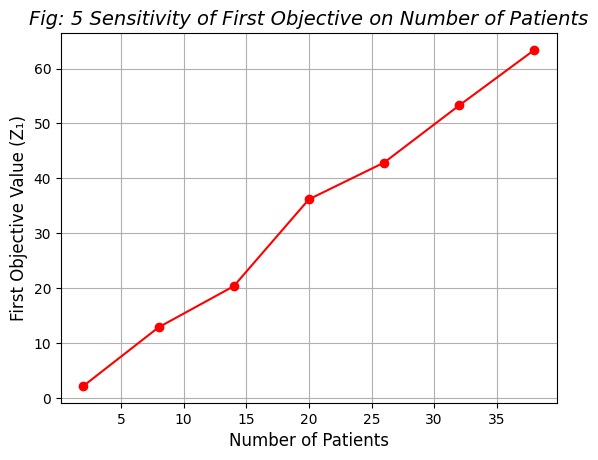

In [34]:
plt.plot(patient_counts, z1_values, color='red', marker='o')
plt.title(r"Fig: 5 Sensitivity of First Objective on Number of Patients", fontsize=14, style='italic')
plt.xlabel("Number of Patients", fontsize=12)
plt.ylabel("First Objective Value (Z₁)", fontsize=12)
plt.grid(True)
plt.savefig("fig 5", dpi=300, bbox_inches='tight')
plt.show()


In [35]:
from IPython.display import display

display(new_data.shape[0])

39

# Z2

In [36]:
import pyomo.environ as pe
from pyomo.environ import SolverFactory, value

def run_z2_for_optimization(ns_value,  df_districts, new_data,loc):
    np.random.seed(42)
    n_rcs = 4
    n_patients = new_data.shape[0]
    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}

    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()
    # Assign random grid locations"
    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    # Full state coverage for patient coordinates (within Mizoram bounds)
    patient_coords = {j: (np.random.uniform(22.5, 24.5), np.random.uniform(92.3, 93.5) )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

    training_cost_dict = {0: 300, 1: 300, 2: 500, 3: 600}
    vehicle_cost_dict = {0: 100, 1: 150}
    activation_cost_dict = {0: 20000, 1: 15000, 2: 10000, 3: 10000}
    rescuer_cost = 500  # uniform cost

    B = 500000  # or any budget limit

    from collections import Counter
    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }

    
    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)for i in range(n_rcs) for j in range(n_patients)}
    vehicle_capacity_dict = {0: 2, 1: 1}
    rescuer_limit = 400  # 👈 forces model to adjust when Ns increases

    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0, 1])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)

    model.A = pe.Param(model.I, initialize=training_cost_dict)  # Ai
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)   # Co
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)  # CAi
    model.Lb = pe.Param(initialize=1)  # minimum number of active RCs
    model.Ub = pe.Param(initialize=4)  # maximum number (total RCs)
    model.B = pe.Param(initialize=B)
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)
    base_profile = {0: 1, 1: 1, 2: 2, 3: 2, 4: 3}
    model.Ns = pe.Param(model.S, initialize={s: base_profile[s] + (ns_value - 1) for s in base_profile})

    # === Constraints ===
    #18
    def one_assignment_per_patient_rule(model, j):
        s = model.SeverityOf[j]
        return sum(
            model.X[i, j, o, m, s, l]
            for i in model.I
            for o in model.O
            for m in model.M
            for l in model.L
            ) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=one_assignment_per_patient_rule)
    def active_rc_bound_rule(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)

    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound_rule)
    #19
    def budget_constraint_rule(model):
        return (sum(model.A[i] * model.Q[i, m] for i in model.I for m in model.M)
                + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
                + sum(model.Y[i] * model.CA[i] for i in model.I)
                <= model.B
        )

    model.BudgetConstraint = pe.Constraint(rule=budget_constraint_rule)
    #17
    def area_demand_rule(model, m):
        
        if model.Fm[m] == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
            for i in model.I for j in model.J if model.AreaOf[j] == m
            for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)
    #
    def assign_rescuers_based_on_severity(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignRescuerCount = pe.Constraint(model.J, rule=assign_rescuers_based_on_severity)

    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)
    
    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)

    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    def unique_severity_assignment(model, i, j, o, m, l):
        return sum(model.X[i, j, o, m, s, l] for s in model.S) <= 1
    model.UniqueSeverityAssignmentConstraint = pe.Constraint(model.I, model.J, model.O, model.M, model.L, rule=unique_severity_assignment)

    # Generate allowed RCs per patient based on distance
    allowed_rcs_per_patient = {
        j: set(i for i, _ in sorted(
            [(i, dist_dict[i, j]) for i in range(n_rcs)],
            key=lambda x: x[1]
        )[:3])  # Top-3 nearest RCs
        for j in range(n_patients)}

    def vehicle_quantity_constraint(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l] for j in model.J for m in model.M for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.vehicle_quantity = pe.Constraint(model.I, model.O, model.L, rule=vehicle_quantity_constraint)

    def link_RC_activation(model, i, m):
        return model.Q[i, m] <= rescuer_limit * model.Y[i]
    model.LinkRC = pe.Constraint(model.I, model.M, rule=link_RC_activation)


    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip

    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)

    # === Objective Z2 ===
    transport_cost_per_km = 10
    model.z2 = pe.Objective(expr=sum(model.A[i] * model.Q[i, m_] for i in model.I for m_ in model.M)
                            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
                            + sum(model.Y[i] * model.CA[i] for i in model.I) 
                            +sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * transport_cost_per_km
                                for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L),
                            sense=pe.minimize)
    # === Solve ===
    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)
    if (result.solver.status != pe.SolverStatus.ok) or (result.solver.termination_condition != pe.TerminationCondition.optimal):
        print(f"Solver failed for Ns = {ns_value}")
        return None
    total_rescuers = sum(value(model.Q[i, m]) for i in model.I for m in model.M)
    return value(model.z2),total_rescuers

In [37]:
ns_range = range(1, 8)
z2_values = []
per_patient = new_data.sample(n=10, random_state=49).reset_index(drop=True)

In [38]:
display(per_patient)

,Age,Gender,Pregnancy_Status,Consciousness_Level,Severe_Bleeding,Fractures,Pulse_Rate,Mobility,Trapped_Duration_Hours,Blood_Pressure,Area,Condition_Label,AreaName
0,37,1,0,1,0,1,59,0,9,136,8,2,Saiha
1,47,0,0,1,1,0,81,1,11,145,3,2,Champhai
2,44,0,1,1,0,0,60,1,5,166,1,1,Aizawl
3,61,1,0,1,0,0,64,1,1,153,3,1,Champhai
4,25,1,0,1,0,0,57,1,9,116,1,0,Aizawl
5,34,1,0,1,1,0,78,1,10,98,5,1,Mamit
6,52,0,0,1,1,0,82,1,7,168,2,3,Lunglei
7,38,1,0,1,0,0,59,1,5,125,3,0,Champhai
8,34,1,0,0,1,0,88,1,5,142,3,2,Champhai
9,31,1,0,1,1,0,78,1,6,123,6,1,Serchhip


In [39]:
for ns in ns_range:
    print(f"Running for Nₛ = {ns}")
    z2,total_rescuers = run_z2_for_optimization(ns,  df_districts,new_data=per_patient,loc=1)
    print("Total rescuers =", total_rescuers)

    if z2 is None:
        z2 = float("nan")  
    z2_values.append(z2)

Running for Nₛ = 1
Total rescuers = 14.0
Running for Nₛ = 2
Total rescuers = 24.0
Running for Nₛ = 3
Total rescuers = 34.0
Running for Nₛ = 4
Total rescuers = 44.0
Running for Nₛ = 5
Total rescuers = 54.0
Running for Nₛ = 6
Total rescuers = 64.0
Running for Nₛ = 7
Total rescuers = 74.0


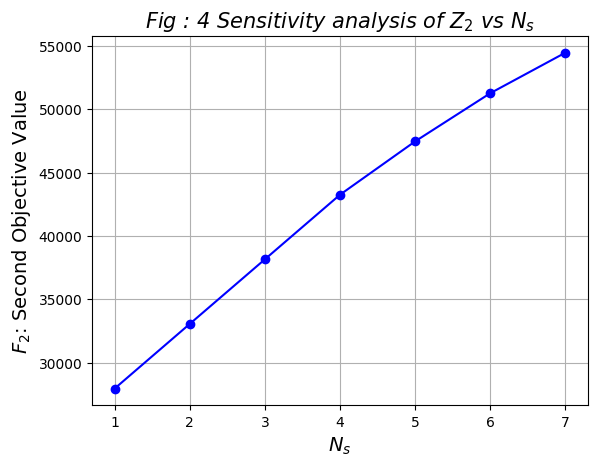

In [40]:
import matplotlib.pyplot as plt

plt.plot(ns_range, z2_values, marker='o', linestyle='-', color='blue')
plt.xlabel(r'$N_s$', fontsize=14)
plt.ylabel(r'$F_2$: Second Objective Value', fontsize=14)
plt.title(r'Fig : 4 Sensitivity analysis of $Z_2$ vs $N_s$', fontsize=15, fontstyle='italic')
plt.grid(True)
plt.xticks(ns_range)
plt.savefig("fig 4", dpi=300, bbox_inches='tight')

plt.show()

In [41]:
z2_values = []

for n in patient_counts:
    subset = new_data.sample(n=n, random_state=42).reset_index(drop=True)
    z2, _ = run_z2_for_optimization(ns_value, df_districts, subset,loc=1)
    
    if z2 is None:
        z2 = float("nan")
    z2_values.append(z2)

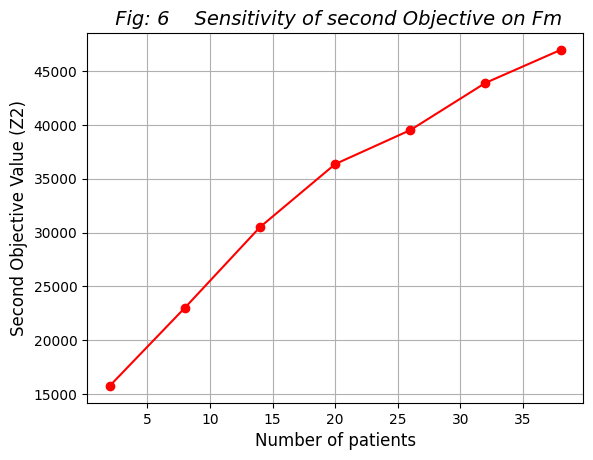

In [42]:
plt.plot(patient_counts, z2_values, color='red', marker='o')
plt.title(r" Fig: 6    Sensitivity of second Objective on Fm", fontsize=14, style='italic')
plt.xlabel("Number of patients", fontsize=12)
plt.ylabel("Second Objective Value (Z2)", fontsize=12)
plt.grid(True)
plt.savefig("fig6", dpi=300, bbox_inches='tight')

plt.show()


# Z3

In [43]:
import pyomo.environ as pe
from pyomo.environ import SolverFactory, value

def run_z1_and_z2(ns_value, new_data, df_districts, loc):
    import numpy as np
    np.random.seed(42)

    n_rcs = 4
    n_patients = new_data.shape[0]
    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}

    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()

    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    # Full state coverage for patient coordinates (within Mizoram bounds)
    patient_coords = {j: (np.random.uniform(22.5, 24.5)*loc, np.random.uniform(92.3, 93.5)*loc )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

    training_cost_dict = {0: 300, 1: 300, 2: 500, 3: 600}
    vehicle_cost_dict = {0: 100, 1: 150}
    activation_cost_dict = {0: 1000, 1: 1500, 2: 2000, 3: 2000}
    rescuer_cost = 300
    B = 50000

    from collections import Counter
    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }

    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)
                 for i in range(n_rcs) for j in range(n_patients)}
    vehicle_capacity_dict = {0: 2, 1: 1}
    rescuer_limit = 400

    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0, 1])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)

    # Parameters
    model.training_cost = pe.Param(model.I, initialize=training_cost_dict)
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)
    model.Lb = pe.Param(initialize=1)
    model.Ub = pe.Param(initialize=4)
    model.B = pe.Param(initialize=B)
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)

    base_profile = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}
    model.Ns = pe.Param(model.S, initialize={s: base_profile[s] + (ns_value - 1) for s in base_profile})

    # === Constraints ===

    def area_demand_rule(model, m):
        if model.Fm[m] == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for j in model.J if model.AreaOf[j] == m
                   for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)

    def active_rc_bound_rule(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)
    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound_rule)

    def budget_constraint_rule(model):
        return (
            sum(model.training_cost[i] * model.Q[i, m] for i in model.I for m in model.M)
            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
            + sum(model.Y[i] * model.CA[i] for i in model.I)
            <= model.B
        )
    model.BudgetConstraint = pe.Constraint(rule=budget_constraint_rule)

    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    def one_assignment_per_patient_rule(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=one_assignment_per_patient_rule)

    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)

    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)

    def link_RC_activation(model, i, m):
        return model.Q[i, m] <= rescuer_limit * model.Y[i]
    model.LinkRC = pe.Constraint(model.I, model.M, rule=link_RC_activation)

    # Only allow top 3 nearest RCs per patient
    allowed_rcs_per_patient = {
        j: set(sorted(range(n_rcs), key=lambda i: dist_dict[i, j])[:3])
        for j in range(n_patients)
    }

    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip
    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)
     #time limit
    severity_allowed_times = {4: [0, 1],
                              3: [0, 1, 2],
                              2: [0, 1, 2, 3],}

    # Rule function to restrict rescue time for critical patients
    def severity_time_window_rule(model, i, j, o, m, s, l):
        if s in severity_allowed_times:
            if l not in severity_allowed_times[s]:
                return model.X[i, j, o, m, s, l] == 0
        return pe.Constraint.Skip

    model.SeverityTimeWindow = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=severity_time_window_rule)


    # === Objective Z1 ===
    model.z1 = pe.Objective(expr=sum(
        model.X[i, j, o, m, s, l] * model.dist[i, j] * (model.Ns[s] / model.CP[o])
        for i in model.I for j in model.J for o in model.O
        for m in model.M for s in model.S for l in model.L
    ), sense=pe.minimize)

    # === Solve ===
    transport_cost_per_km = 10  # or whatever value you need

   

    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)

    if (result.solver.status != pe.SolverStatus.ok) or \
       (result.solver.termination_condition != pe.TerminationCondition.optimal):
        print(f"Solver failed for Ns = {ns_value}")
        return None
    z2 = value(sum(model.training_cost[i] * model.Q[i, m_] for i in model.I for m_ in model.M)
    + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
    + sum(model.Y[i] * model.CA[i] for i in model.I) + sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * 10 
                                                           for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L))

    return value(model.z1),value(z2)


In [44]:
import pyomo.environ as pe
from pyomo.environ import SolverFactory, value

def run_z2_and_z1(ns_value, new_data, df_districts, loc):
    import numpy as np
    np.random.seed(42)

    n_rcs = 4
    n_patients = new_data.shape[0]
    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}

    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()

    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    # Full state coverage for patient coordinates (within Mizoram bounds)
    patient_coords = {j: (np.random.uniform(22.5, 24.5)*loc, np.random.uniform(92.3, 93.5)*loc )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])


    training_cost_dict = {0: 300, 1: 300, 2: 500, 3: 600}
    vehicle_cost_dict = {0: 100, 1: 150}
    activation_cost_dict = {0: 1000, 1: 1500, 2: 2000, 3: 2000}
    rescuer_cost = 300
    B = 50000

    from collections import Counter
    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }

    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)
                 for i in range(n_rcs) for j in range(n_patients)}
    vehicle_capacity_dict = {0: 2, 1: 1}
    rescuer_limit = 400

    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0, 1])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)

    # Parameters
    model.training_cost = pe.Param(model.I, initialize=training_cost_dict)
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)
    model.Lb = pe.Param(initialize=1)
    model.Ub = pe.Param(initialize=4)
    model.B = pe.Param(initialize=B)
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)

    base_profile = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}
    model.Ns = pe.Param(model.S, initialize={s: base_profile[s] + (ns_value - 1) for s in base_profile})

    # === Constraints ===

    def area_demand_rule(model, m):
        if model.Fm[m] == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for j in model.J if model.AreaOf[j] == m
                   for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)

    def active_rc_bound_rule(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)
    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound_rule)

    def budget_constraint_rule(model):
        return (
            sum(model.training_cost[i] * model.Q[i, m] for i in model.I for m in model.M)
            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
            + sum(model.Y[i] * model.CA[i] for i in model.I)
            <= model.B
        )
    model.BudgetConstraint = pe.Constraint(rule=budget_constraint_rule)

    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    def one_assignment_per_patient_rule(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=one_assignment_per_patient_rule)

    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)

    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)

    def link_RC_activation(model, i, m):
        return model.Q[i, m] <= rescuer_limit * model.Y[i]
    model.LinkRC = pe.Constraint(model.I, model.M, rule=link_RC_activation)

    # Only allow top 3 nearest RCs per patient
    allowed_rcs_per_patient = {
        j: set(sorted(range(n_rcs), key=lambda i: dist_dict[i, j])[:3])
        for j in range(n_patients)
    }

    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip
    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)

    #time limit
    severity_allowed_times = {4: [0, 1],
                              3: [0, 1, 2],
                              2: [0, 1, 2, 3],}

    # Rule function to restrict rescue time for critical patients
    def severity_time_window_rule(model, i, j, o, m, s, l):
        if s in severity_allowed_times:
            if l not in severity_allowed_times[s]:
                return model.X[i, j, o, m, s, l] == 0
        return pe.Constraint.Skip

    model.SeverityTimeWindow = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=severity_time_window_rule)


    # === Objective Z1 ===
    model.z2 = pe.Objective(expr=sum(model.training_cost[i] * model.Q[i, m_] for i in model.I for m_ in model.M)
                            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
                            + sum(model.Y[i] * model.CA[i] for i in model.I)
                            + sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * 10
                                  for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L),
                            sense=pe.minimize)
    # === Solve ===
    

    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)

    if (result.solver.status != pe.SolverStatus.ok) or \
       (result.solver.termination_condition != pe.TerminationCondition.optimal):
        print(f"Solver failed for Ns = {ns_value}")
        return None
    z1_expr = sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * (model.Ns[s] / model.CP[o])
                  for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L)
    return value(z1_expr), value(model.z2)



In [45]:
def run_z1_z2_combined(ns_value, new_data, df_districts, loc, w1=0.5, w2=0.5):
    import pyomo.environ as pe
    import numpy as np
    from pyomo.environ import SolverFactory, value
    np.random.seed(42)

    n_rcs = 4
    n_patients = new_data.shape[0]

    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}
    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()

    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    # Full state coverage for patient coordinates (within Mizoram bounds)
    patient_coords = {j: (np.random.uniform(22.5, 24.5)*loc, np.random.uniform(92.3, 93.5)*loc )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])

    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)
                 for i in range(n_rcs) for j in range(n_patients)}
    training_cost_dict = {0: 300, 1: 300, 2: 500, 3: 600}
    vehicle_cost_dict = {0: 100, 1: 150}
    activation_cost_dict = {0: 1000, 1: 1500, 2: 2000, 3: 2000}
    vehicle_capacity_dict = {0: 2, 1: 1}
    rescuer_limit = 400
    B = 50000
    transport_cost_per_km = 10

    from collections import Counter
    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }

    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0, 1])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)

    model.training_cost = pe.Param(model.I, initialize=training_cost_dict)
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)
    model.Lb = pe.Param(initialize=1)
    model.Ub = pe.Param(initialize=4)
    model.B = pe.Param(initialize=B)
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)
    base_profile = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}
    model.Ns = pe.Param(model.S, initialize={s: base_profile[s] + (ns_value - 1) for s in base_profile})

    def area_demand_rule(model, m):
        if model.Fm[m] == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for j in model.J if model.AreaOf[j] == m
                   for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)

    def active_rc_bound_rule(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)
    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound_rule)

    def budget_constraint_rule(model):
        return (
            sum(model.training_cost[i] * model.Q[i, m] for i in model.I for m in model.M)
            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
            + sum(model.Y[i] * model.CA[i] for i in model.I)
            <= model.B
        )
    model.BudgetConstraint = pe.Constraint(rule=budget_constraint_rule)

    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    def one_assignment_per_patient_rule(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=one_assignment_per_patient_rule)

    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)

    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)

    def link_RC_activation(model, i, m):
        return model.Q[i, m] <= rescuer_limit * model.Y[i]
    model.LinkRC = pe.Constraint(model.I, model.M, rule=link_RC_activation)

    # Limit to top 3 nearest RCs
    allowed_rcs_per_patient = {
        j: set(sorted(range(n_rcs), key=lambda i: dist_dict[i, j])[:3])
        for j in range(n_patients)
    }
    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip
    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)

     #time limit
    severity_allowed_times = {4: [0, 1],
                              3: [0, 1, 2],
                              2: [0, 1, 2, 3],}

    # Rule function to restrict rescue time for critical patients
    def severity_time_window_rule(model, i, j, o, m, s, l):
        if s in severity_allowed_times:
            if l not in severity_allowed_times[s]:
                return model.X[i, j, o, m, s, l] == 0
        return pe.Constraint.Skip

    model.SeverityTimeWindow = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=severity_time_window_rule)


    # Z1 and Z2 expressions
    z1_expr = sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * (model.Ns[s] / model.CP[o])
                  for i in model.I for j in model.J for o in model.O
                  for m in model.M for s in model.S for l in model.L)

    z2_expr = sum(model.training_cost[i] * model.Q[i, m_] for i in model.I for m_ in model.M) + \
              sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L) + \
              sum(model.Y[i] * model.CA[i] for i in model.I) + \
              sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * transport_cost_per_km
                  for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L)

    # Combined objective
    Z1_scale = 100   
    Z2_scale = 1000 
    model.z_combined = pe.Objective(expr=w1 * (z1_expr / Z1_scale) + w2 * (z2_expr / Z2_scale),sense=pe.minimize)
    # Solve
    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)

    if (result.solver.status != pe.SolverStatus.ok) or \
       (result.solver.termination_condition != pe.TerminationCondition.optimal):
        print(f"Solver failed at loc = {loc}")
        return None

    return value(z1_expr), value(z2_expr), value(model.z_combined)

In [46]:
ns_value = 1
max_loc = 60
location = list(range(1, max_loc + 1, 6))  # [1, 7, 13, ..., 55, 61]

z1_star_values = []
z2_worst_values = []
z2_star_values = []
z1_worst_values = []
z1_combined_values = []
z2_combined_values = []
z_combined_values = []
loc_values = []

for l in location:
    n_patients = 30
    subset = new_data.sample(n=n_patients, random_state=42).reset_index(drop=True)

    # --- First: Minimize Z1 ---
    result1 = run_z1_and_z2(ns_value=ns_value, new_data=subset, df_districts=df_districts, loc=l)
    if result1 is None:
        z1_star, z2_worst = float("nan"), float("nan")
    else:
        z1_star, z2_worst = result1

    # --- Second: Minimize Z2 ---
    result2 = run_z2_and_z1(ns_value=ns_value, new_data=subset, df_districts=df_districts, loc=l)
    if result2 is None:
        z2_star, z1_worst = float("nan"), float("nan")
    else:
        z1_worst, z2_star = result2

    # --- Third: Minimize Combined Objective (Z1 and Z2) ---
    result3 = run_z1_z2_combined(ns_value=ns_value, new_data=subset, df_districts=df_districts, loc=l)
    if result3 is None:
        z1_comb, z2_comb, z_comb = float("nan"), float("nan"), float("nan")
    else:
        z1_comb, z2_comb, z_comb = result3

    # Store all results
    z1_star_values.append(z1_star)
    z2_worst_values.append(z2_worst)
    z2_star_values.append(z2_star)
    z1_worst_values.append(z1_worst)
    z1_combined_values.append(z1_comb)
    z2_combined_values.append(z2_comb)
    z_combined_values.append(z_comb)
    loc_values.append(l)

In [47]:
compute_z3 = pd.DataFrame({
    "Z1* (×10 m)": [z / 10 for z in z1_star_values],
    "Z1_worst (×10 m)": [z / 10 for z in z1_worst_values],
    "Z2* (×10^3 ₹)": [z / 1000 for z in z2_star_values],
    "Z2_worst (×10^3 ₹)": [z / 1000 for z in z2_worst_values],
    "Z1_combined (×10 m)": [z / 10 for z in z1_combined_values],
    "Z2_combined (×10^3 ₹)": [z / 1000 for z in z2_combined_values],
})

display(compute_z3)


,Z1* (×10 m),Z1_worst (×10 m),Z2* (×10^3 ₹),Z2_worst (×10^3 ₹),Z1_combined (×10 m),Z2_combined (×10^3 ₹)
0,2.2755,3.1985,13.6397,50.1551,3.1985,13.6397
1,863.6355,864.9990,185.9998,221.0271,864.9230,185.9846
2,1725.9345,1727.2130,358.4426,367.3869,1727.2130,358.4426
3,2588.2345,2589.5130,530.9026,539.8469,2589.5130,530.9026
4,3450.5350,3451.8700,703.3740,712.3070,3451.8125,703.3625
5,4312.8335,4314.1125,875.8225,884.7667,4314.1125,875.9225
6,5175.1330,5176.4105,1048.3821,1057.2266,5176.4105,1048.3821
7,6037.4335,6038.7105,1220.7421,1229.6867,6038.7105,1220.7421
8,6899.7315,6901.0100,1393.2020,1402.1463,6901.1420,1393.3284
9,7762.0320,7763.3095,1565.7619,1574.6064,7763.3095,1565.7619


In [48]:
# Parameters
W1 = 0.5
W2 = 0.5
P = 1

def compute_lp_metric(row):
    try:
        # Updated column names to match compute_z3
        term1 = (row["Z1* (×10 m)"] - row["Z1_combined (×10 m)"]) / (row["Z1* (×10 m)"] - row["Z1_worst (×10 m)"])
        term2 = (row["Z2* (×10^3 ₹)"] - row["Z2_combined (×10^3 ₹)"]) / (row["Z2* (×10^3 ₹)"] - row["Z2_worst (×10^3 ₹)"])
        
        # Handle divide-by-zero
        term1 = 0 if (row["Z1* (×10 m)"] == row["Z1_worst (×10 m)"]) else term1
        term2 = 0 if (row["Z2* (×10^3 ₹)"] == row["Z2_worst (×10^3 ₹)"]) else term2

        lp = (W1 * (term1 ** P) + W2 * (term2 ** P)) ** (1 / P)
        return lp
    except:
        return np.nan

# Apply LP Metric and add to DataFrame
compute_z3["Z3"] = compute_z3.apply(compute_lp_metric, axis=1)

# Display
display(compute_z3)


,Z1* (×10 m),Z1_worst (×10 m),Z2* (×10^3 ₹),Z2_worst (×10^3 ₹),Z1_combined (×10 m),Z2_combined (×10^3 ₹),Z3
0,2.2755,3.1985,13.6397,50.1551,3.1985,13.6397,0.500000
1,863.6355,864.9990,185.9998,221.0271,864.9230,185.9846,0.471914
2,1725.9345,1727.2130,358.4426,367.3869,1727.2130,358.4426,0.500000
3,2588.2345,2589.5130,530.9026,539.8469,2589.5130,530.9026,0.500000
4,3450.5350,3451.8700,703.3740,712.3070,3451.8125,703.3625,0.477821
5,4312.8335,4314.1125,875.8225,884.7667,4314.1125,875.9225,0.505590
6,5175.1330,5176.4105,1048.3821,1057.2266,5176.4105,1048.3821,0.500000
7,6037.4335,6038.7105,1220.7421,1229.6867,6038.7105,1220.7421,0.500000
8,6899.7315,6901.0100,1393.2020,1402.1463,6901.1420,1393.3284,0.558689
9,7762.0320,7763.3095,1565.7619,1574.6064,7763.3095,1565.7619,0.500000


# Sensitivity Analysis


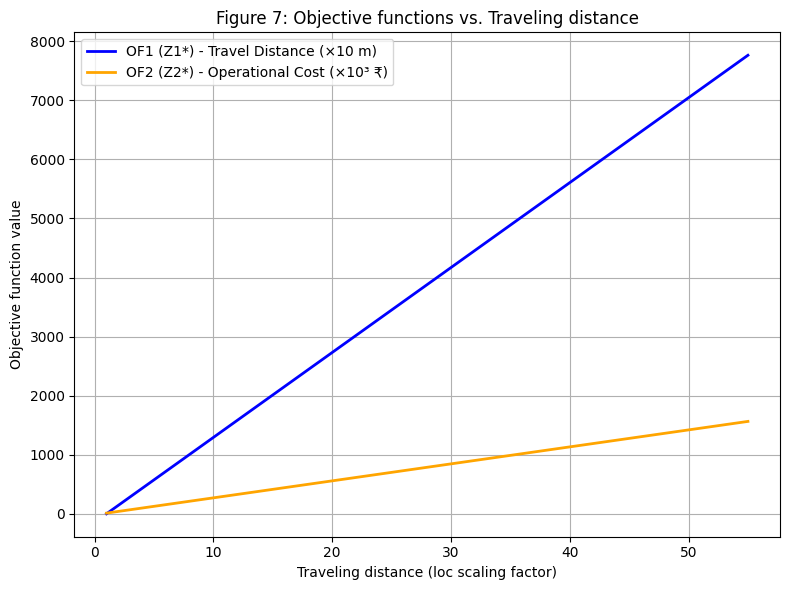

In [49]:
import matplotlib.pyplot as plt

# Plot Z1* and Z2* vs Travel Distance (loc scaling factor)
plt.figure(figsize=(8, 6))

plt.plot(loc_values, compute_z3["Z1* (×10 m)"], label="OF1 (Z1*) - Travel Distance (×10 m)", color='blue', linewidth=2)
plt.plot(loc_values, compute_z3["Z2* (×10^3 ₹)"], label="OF2 (Z2*) - Operational Cost (×10³ ₹)", color='orange', linewidth=2)

plt.xlabel("Traveling distance (loc scaling factor)")
plt.ylabel("Objective function value")
plt.title("Figure 7: Objective functions vs. Traveling distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("fig 7", dpi=300, bbox_inches='tight')

plt.show()


In [50]:
from pyomo.environ import Constraint, ConstraintList

def add_constraints(model, new_data):
    # Helper to safely add components without warnings
    def safe_add_component(model, name, component):
        if hasattr(model, name):
            model.del_component(name)
        setattr(model, name, component)

    # 1. Each patient assigned exactly once
    def assign_each_patient_once(model, j):
        return sum(model.X[j, m, i, v, l, s]
                   for m in model.M
                   for i in model.I
                   for v in model.V
                   for l in model.L
                   for s in model.S) == 1
    safe_add_component(model, "AssignEach", pe.Constraint(model.J, rule=assign_each_patient_once))

    # 2. Minimum rescuers per area
    def min_rescuers_constraint(model, m):
        relevant_j = [j for j in model.J if model.area_of[j] == m]
        if not relevant_j:
            return Constraint.Feasible
        return sum(model.X[j, m, i, v, l, s] * model.rescue_required[j]
                   for j in relevant_j for i in model.I
                   for v in model.V for l in model.L for s in model.S) >= model.Fm[m]
    safe_add_component(model, "MinRescuers", pe.Constraint(model.M, rule=min_rescuers_constraint))

    # 3. RC capacity
    def rc_capacity_constraint(model, i):
        return sum(model.X[j, m, i, v, l, s]
                   for j in model.J for m in model.M
                   for v in model.V for l in model.L for s in model.S) <= model.rc_capacity[i]
    safe_add_component(model, "RCCapacity", pe.Constraint(model.I, rule=rc_capacity_constraint))

    # 4. Area rescue requirement
    def area_rescue_requirement(model, m):
        return sum(model.Q[i, m] for i in model.I) >= model.alpha[m]
    safe_add_component(model, "MinRescuePerArea", pe.Constraint(model.M, rule=area_rescue_requirement))

    # 5. Vehicle capacity
    def vehicle_capacity_constraint(model, v, i, l):
        return sum(model.X[j, m, i, v, l, s]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, v, l] * model.capacity[v]
    safe_add_component(model, "VehicleCapacity", pe.Constraint(model.V, model.I, model.L, rule=vehicle_capacity_constraint))

    # 6. Severity-specific time limits
    if hasattr(model, "SeverityTimeLimit"):
        model.del_component("SeverityTimeLimit")
    model.SeverityTimeLimit = ConstraintList()
    severity_allowed_times = {4: [0, 1], 3: [0, 1, 2], 2: [0, 1, 2, 3]}
    for j in model.J:
        sev = new_data.loc[j, "Condition_Label"]
        if sev in severity_allowed_times:
            disallowed_l = [l for l in model.L if l not in severity_allowed_times[sev]]
            for l in disallowed_l:
                for m in model.M:
                    for i in model.I:
                        for v in model.V:
                            model.SeverityTimeLimit.add(model.X[j, m, i, v, l, sev] == 0)

    # 7. Vehicle limit
    def vehicle_limit_constraint(model, i, v, l):
        return model.N[i, v, l] <= model.max_vehicles[i, v, l]
    safe_add_component(model, "VehicleLimit", pe.Constraint(model.I, model.V, model.L, rule=vehicle_limit_constraint))

    # 8. RC activation
    def rc_activation_link(model, i):
        return (sum(model.N[i, v, l] for v in model.V for l in model.L) +
                sum(model.Q[i, m] for m in model.M)) <= 1000 * model.Y[i]
    safe_add_component(model, "RCActivationLink", pe.Constraint(model.I, rule=rc_activation_link))

    # 9. Budget constraint
    def budget_constraint_rule(model):
        vehicle_costs = sum(model.cost[v] * model.N[i, v, l]
                            for i in model.I for v in model.V for l in model.L)
        rc_activation_costs = sum(model.Ai[i] * model.Y[i] for i in model.I)
        transport_costs = sum(50 * model.dist[i, j] * model.X[j, m, i, v, l, s]
                              for i in model.I for j in model.J for v in model.V
                              for m in model.M for s in model.S for l in model.L)
        training_costs = sum(model.training_cost[m] * model.Ns[s] * model.X[j, m, i, v, l, s]
                             for j in model.J for m in model.M for i in model.I
                             for v in model.V for l in model.L for s in model.S)
        return vehicle_costs + rc_activation_costs + transport_costs + training_costs <= model.B
    safe_add_component(model, "BudgetConstraint", pe.Constraint(rule=budget_constraint_rule))

    # 10. Rescuer constraints
    def rescuer_allocation_constraint(model, i, m):
        return model.Q[i, m] >= sum(model.Ns[model.severity_of[j]] * model.X[j, m, i, v, l, model.severity_of[j]]
                                    for j in model.J for v in model.V for l in model.L if model.area_of[j] == m)
    safe_add_component(model, "RescuerAllocation", pe.Constraint(model.I, model.M, rule=rescuer_allocation_constraint))

    def rescuer_assignment_constraint(model, i, m):
        return model.Q[i, m] >= sum(model.X[j, m, i, v, l, s] * model.Ns[s]
                                    for j in model.J for v in model.V for l in model.L for s in model.S
                                    if model.area_of[j] == m)
    safe_add_component(model, "RescuerLink", pe.Constraint(model.I, model.M, rule=rescuer_assignment_constraint))

    def rescuer_assignment_requirement(model, i, m):
        return model.Q[i, m] >= sum(model.X[j, m, i, v, l, s] * model.Ns[s]
                                    for j in model.J for v in model.V for l in model.L for s in model.S)
    safe_add_component(model, "RescueMatching", pe.Constraint(model.I, model.M, rule=rescuer_assignment_requirement))

    return model


In [51]:
def add_objective_z1(model):
    model.z1 = pe.Objective(
        expr=sum(
            50 * model.dist[i, j] * model.X[j, m, i, v, l, s]
            for j in model.J for m in model.M for i in model.I
            for v in model.V for l in model.L for s in model.S
        ),
        sense=pe.minimize
    )
    return model


In [52]:
def add_objective_z2(model):
    def z2_rule(model):
        vehicle_costs = sum(model.cost[v] * model.N[i, v, l]
                            for i in model.I for v in model.V for l in model.L)
        rc_activation_costs = sum(model.Ai[i] * model.Y[i] for i in model.I)
        rescuer_training_costs = sum(
            model.training_cost[m] * model.X[j, m, i, v, l, s] * model.Ns[s]
            for j in model.J for m in model.M for i in model.I for v in model.V for l in model.L for s in model.S
        )
        transport_cost_per_km = 50
        patient_transport_costs = sum(
            transport_cost_per_km * model.dist[i, j] * model.X[j, m, i, v, l, s]
            for i in model.I for j in model.J for v in model.V
            for m in model.M for l in model.L for s in model.S
        )
        return vehicle_costs + rc_activation_costs + rescuer_training_costs + patient_transport_costs

    model.z2 = pe.Objective(rule=z2_rule, sense=pe.minimize)
    return model


In [53]:
from pyomo.environ import value

def total_rescuers_and_vehicles(ns_value, new_data, df_districts, loc, budget,enforce_min_rescuers=False,
                                vehicle_cap=False,rescuer_cap=False,rescuer_capacity_require=False,vehicle_capacity_dict=None,objective_type=None):
    import pyomo.environ as pe
    import numpy as np
    from pyomo.environ import SolverFactory, value
    np.random.seed(42)

    n_rcs = 4
    n_patients = new_data.shape[0]

    area_id_to_name = {1: "Aizawl",2: "Lunglei",3: "Champhai",4: "Kolasib",5: "Mamit",
                       6: "Serchhip",7: "Lawngtlai",8: "Saiha",9: "Hnahthial",10: "Khawzawl",11: "Saitual"}
    area_name_to_id = {v: k for k, v in area_id_to_name.items()}
    severity_map = new_data["Condition_Label"].to_dict()
    area_of_dict = new_data["Area"].to_dict()

    rc_city_coords = {
        0: ("Aizawl", (23.7271, 92.7176)),
        1: ("Lunglei", (22.8804, 92.7332)),
        2: ("Champhai", (23.4562, 93.3280)),
        3: ("Lawngtlai", (22.5160, 92.9042))}
    rc_coords = {i: coords for i, (_, coords) in rc_city_coords.items()}
    patient_coords = {j: (np.random.uniform(22.5, 24.5), np.random.uniform(92.3, 93.5) )for j in range(n_patients)}

    def euclidean(p1, p2):
        return np.hypot(p1[0] - p2[0], p1[1] - p2[1])


    dist_dict = {(i, j): round(euclidean(rc_coords[i], patient_coords[j]) + np.random.uniform(0, 5), 2)
                 for i in range(n_rcs) for j in range(n_patients)}
    training_cost_dict = {0: 300, 1: 300, 2: 500, 3: 600}
    vehicle_cost_dict = {0: 2500}
    activation_cost_dict = {0: 1000, 1: 1500, 2: 2000, 3: 2000}
    if vehicle_capacity_dict is None:
        vehicle_capacity_dict = {0: 2}
    rescuer_limit = 1000
    transport_cost_per_km = 10

    from collections import Counter
    fm_counts = Counter(area_of_dict.values())
    fm_dict = {m: fm_counts.get(m, 0) for m in area_id_to_name.keys()}
    alpha_dict = {
        area_name_to_id[row["District"]]: row["WASPAS_Score"]
        for _, row in df_districts.iterrows()
    }


    model = pe.ConcreteModel()
    model.I = pe.Set(initialize=range(n_rcs))
    model.J = pe.Set(initialize=range(n_patients))
    model.O = pe.Set(initialize=[0])
    model.M = pe.Set(initialize=area_id_to_name.keys())
    model.S = pe.Set(initialize=[0, 1, 2, 3, 4])
    model.L = pe.Set(initialize=[0, 1, 2, 3, 4])

    model.X = pe.Var(model.I, model.J, model.O, model.M, model.S, model.L, domain=pe.Binary)
    model.Q = pe.Var(model.I, model.M, domain=pe.NonNegativeIntegers)
    model.N = pe.Var(model.I, model.O, model.L, domain=pe.NonNegativeIntegers)
    model.Y = pe.Var(model.I, domain=pe.Binary)

    model.training_cost = pe.Param(model.I, initialize=training_cost_dict)
    model.C = pe.Param(model.O, initialize=vehicle_cost_dict)
    model.CA = pe.Param(model.I, initialize=activation_cost_dict)
    model.Lb = pe.Param(initialize=1)
    model.Ub = pe.Param(initialize=4)
    model.B = pe.Param(initialize=budget) 
    model.AreaOf = pe.Param(model.J, initialize=area_of_dict)
    model.SeverityOf = pe.Param(model.J, initialize=severity_map)
    model.CP = pe.Param(model.O, initialize=vehicle_capacity_dict)
    model.Fm = pe.Param(model.M, initialize=fm_dict)
    model.alpha = pe.Param(model.M, initialize=alpha_dict)
    model.dist = pe.Param(model.I, model.J, initialize=dist_dict)
    base_profile = {0: 1, 1: 1, 2: 2, 3: 2, 4: 3}
    model.Ns = pe.Param(model.S, initialize={s: base_profile[s] + (ns_value - 1) for s in base_profile})
    min_expected_rescuers = min(len(new_data), budget // 2000)
    model.MinExpectedRescuers = pe.Param(initialize=min_expected_rescuers)

    

    def area_demand_rule(model, m):
        if model.Fm[m] == 0:
            return pe.Constraint.Skip
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for j in model.J if model.AreaOf[j] == m
                   for o in model.O for s in model.S for l in model.L) >= model.Fm[m]
    model.AreaDemandConstraint = pe.Constraint(model.M, rule=area_demand_rule)

    def active_rc_bound_rule(model):
        return (model.Lb, sum(model.Y[i] for i in model.I), model.Ub)
    model.ActiveRCBound = pe.Constraint(rule=active_rc_bound_rule)

    def budget_constraint_rule(model):
        return (
            sum(model.training_cost[i] * model.Q[i, m] for i in model.I for m in model.M)
            + sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
            + sum(model.Y[i] * model.CA[i] for i in model.I)
            <= model.B
        )
    model.BudgetConstraint = pe.Constraint(rule=budget_constraint_rule)

    def vehicle_capacity_rule(model, i, o, l):
        return sum(model.X[i, j, o, m, s, l]
                   for m in model.M for j in model.J for s in model.S) <= model.N[i, o, l] * model.CP[o]
    model.VehicleCapacityConstraint = pe.Constraint(model.I, model.O, model.L, rule=vehicle_capacity_rule)

    def one_assignment_per_patient_rule(model, j):
        s = model.SeverityOf[j]
        return sum(model.X[i, j, o, m, s, l]
                   for i in model.I for o in model.O for m in model.M for l in model.L) == 1
    model.AssignOnce = pe.Constraint(model.J, rule=one_assignment_per_patient_rule)

    def patient_assignment_rescuer_link(model, i, m):
        return sum(model.X[i, j, o, m, s, l] * model.Ns[s]
                   for j in model.J for o in model.O for s in model.S for l in model.L) <= model.Q[i, m]
    model.AssignmentRequiresRescuersConstraint = pe.Constraint(model.I, model.M, rule=patient_assignment_rescuer_link)

    def rescuer_capacity_limit(model, i, m):
        return model.Q[i, m] <= rescuer_limit
    model.RescuerCapacityLimit = pe.Constraint(model.I, model.M, rule=rescuer_capacity_limit)

    def link_RC_activation(model, i, m):
        return model.Q[i, m] <= rescuer_limit * model.Y[i]
    model.LinkRC = pe.Constraint(model.I, model.M, rule=link_RC_activation)

    # Limit to top 3 nearest RCs
    allowed_rcs_per_patient = {
        j: set(sorted(range(n_rcs), key=lambda i: dist_dict[i, j])[:3])
        for j in range(n_patients)
    }
    def rc_access_filter(model, i, j, o, m, s, l):
        if i not in allowed_rcs_per_patient[j]:
            return model.X[i, j, o, m, s, l] == 0
        else:
            return pe.Constraint.Skip
    model.AllowedRCs = pe.Constraint(model.I, model.J, model.O, model.M, model.S, model.L, rule=rc_access_filter)

    def soft_vehicle_expansion_rule(model):
        max_expected_vehicles = value(model.B) // 5000
        required_min_vehicles = sum(1 for j in model.J) // 2  # assuming 2 patients per vehicle

        if max_expected_vehicles < required_min_vehicles:
            return pe.Constraint.Skip

        actual_vehicles_used = sum(model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
        return actual_vehicles_used <= max_expected_vehicles

    model.VehicleBudgetSoft = pe.Constraint(rule=soft_vehicle_expansion_rule)
    
    if enforce_min_rescuers:
        rescuer_budget_ratio = 1000  # 👈 Each ₹1000 allows 1 rescuer
        min_expected_rescuers = budget // rescuer_budget_ratio
        if hasattr(model, "MinExpectedRescuers"):
            model.del_component("MinExpectedRescuers")
        model.MinExpectedRescuers = pe.Param(initialize=min_expected_rescuers)

        def budget_driven_rescuer_min(model):
            return sum(model.Q[i, m] for i in model.I for m in model.M) >= model.MinExpectedRescuers
        

        model.MinRescuerBudgetLink = pe.Constraint(rule=budget_driven_rescuer_min)
        
    if vehicle_cap:
        def encourage_fewer_vehicles(model):
            max_expected_vehicles = len(model.J) // model.CP[0] + 5  # Slack
            return sum(model.N[i, o, l] for i in model.I for o in model.O for l in model.L) <= max_expected_vehicles

        model.SoftVehicleCap = pe.Constraint(rule=encourage_fewer_vehicles)
        
    
    if rescuer_cap:
        def inverse_rescuer_vs_cp(model):
            
            cp = list(model.CP.values())[0]  # Vehicle capacity
            total_rescuers = sum(model.Q[i, m] for i in model.I for m in model.M)
            total_patients = len(model.J)
            base_rescuer_per_patient = 2
            slack = 60
            rescuer_limit = slack + (total_patients * base_rescuer_per_patient / cp)
            return total_rescuers <= rescuer_limit

        model.InverseRescuerVsCapacity = pe.Constraint(rule=inverse_rescuer_vs_cp)

    if rescuer_capacity_require:
        def more_rescuers_more_trips_and_vehicles(model):
            rescuers_per_trip = 3 
            slack = 5 
            total_rescuers = sum(model.Q[i, m] for i in model.I for m in model.M)
            total_vehicles = sum(model.N[i, o, l] for i in model.I for o in model.O for l in model.L)
            required_trips = total_rescuers / rescuers_per_trip
            return total_vehicles >= required_trips - slack

        model.RescuersDriveTripsAndVehicles = pe.Constraint(rule=more_rescuers_more_trips_and_vehicles)

    z1_expr = sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * (model.Ns[s] / model.CP[o])
                  for i in model.I for j in model.J for o in model.O
                  for m in model.M for s in model.S for l in model.L)

    z2_expr = sum(model.training_cost[i] * model.Q[i, m_] for i in model.I for m_ in model.M) + \
              sum(model.C[o] * model.N[i, o, l] for i in model.I for o in model.O for l in model.L) + \
              sum(model.Y[i] * model.CA[i] for i in model.I) + \
              sum(model.X[i, j, o, m, s, l] * model.dist[i, j] * transport_cost_per_km
                  for i in model.I for j in model.J for o in model.O for m in model.M for s in model.S for l in model.L)
 
    if objective_type == "combined":
        model.z_combined = pe.Objective(expr=0.5 * z1_expr + 0.5 * z2_expr, sense=pe.minimize)
    elif objective_type == "z1":
        model.z1 = pe.Objective(expr=z1_expr, sense=pe.minimize)
    elif objective_type == "z2":
        model.z2 = pe.Objective(expr=z2_expr, sense=pe.minimize)
    elif objective_type == "none":
        pass 
    else:
        raise ValueError(f"Unknown objective_type: {objective_type}")
                         
    solver = pe.SolverFactory("gurobi")
    result = solver.solve(model, tee=False)

    if (result.solver.status != pe.SolverStatus.ok) or \
       (result.solver.termination_condition != pe.TerminationCondition.optimal):
        raise RuntimeError("Solver failed or no optimal solution found.")

    total_rescuers_used = sum(pe.value(model.Q[i, m]) for i in model.I for m in model.M)
    total_vehicles_used = sum(pe.value(model.N[i, o, l]) for i in model.I for o in model.O for l in model.L)

    return total_rescuers_used, total_vehicles_used
    



In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Helper to create fixed patients with cyclic severity and area
def create_fixed_patients(n_patients, area_id_to_name):
    severity_pattern = [0, 1, 2, 3, 4] * ((n_patients // 5) + 1)
    area_ids = list(area_id_to_name.keys())
    area_pattern = area_ids * ((n_patients // len(area_ids)) + 1)
    
    return pd.DataFrame({
        "Condition_Label": severity_pattern[:n_patients],
        "Area": area_pattern[:n_patients]
    })

1 patients → 1 vehicles
2 patients → 1 vehicles
3 patients → 2 vehicles
4 patients → 2 vehicles
5 patients → 3 vehicles
6 patients → 3 vehicles
7 patients → 4 vehicles
8 patients → 4 vehicles
9 patients → 5 vehicles
10 patients → 5 vehicles
11 patients → 6 vehicles
12 patients → 6 vehicles
13 patients → 7 vehicles
14 patients → 7 vehicles
15 patients → 8 vehicles
16 patients → 8 vehicles
17 patients → 9 vehicles
18 patients → 9 vehicles
19 patients → 10 vehicles
20 patients → 10 vehicles


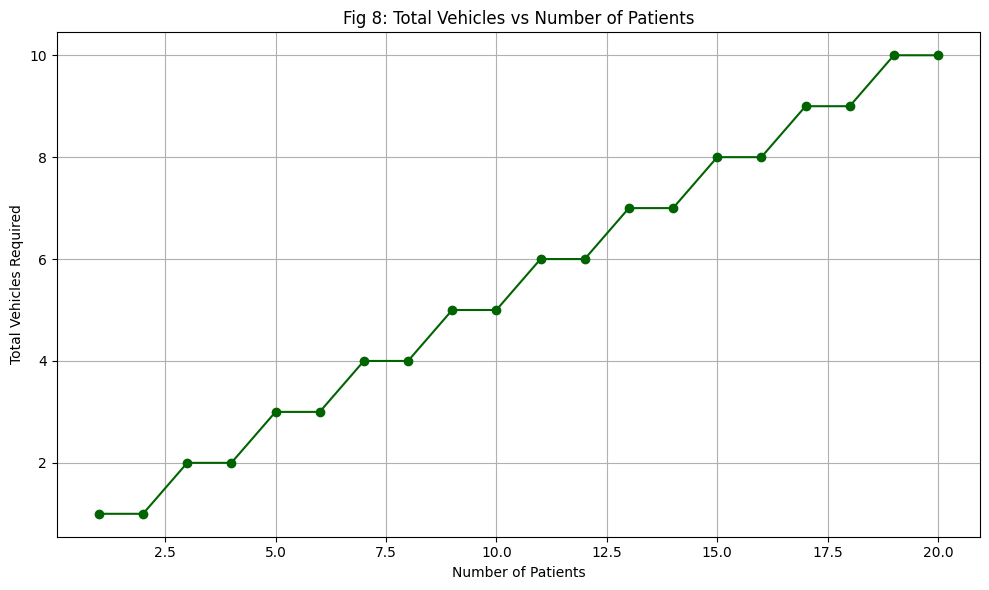

In [55]:
# Plot function for Total Vehicles vs Number of Patients
def plot_vehicles_vs_patients(patient_range, df_districts, area_id_to_name,
                               ns_value=1, loc=1.0, budget=50000):
    vehicle_required = []
    patient_counts = []

    for n in patient_range:
        new_data = create_fixed_patients(n, area_id_to_name)

        try:
            _, vehicles = total_rescuers_and_vehicles(
                ns_value=ns_value,
                new_data=new_data,
                df_districts=df_districts,
                loc=loc,
                budget=budget,
                vehicle_cap=True,
                objective_type="combined"
)
            vehicle_required.append(vehicles)
            patient_counts.append(n)
            print(f"{n} patients → {vehicles:.0f} vehicles")
        except Exception as e:
            print(f"❌ Failed for {n} patients: {e}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(patient_counts, vehicle_required, marker='o', linestyle='-', color='darkgreen')
    plt.title("Fig 8: Total Vehicles vs Number of Patients")
    plt.xlabel("Number of Patients")
    plt.ylabel("Total Vehicles Required")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig 8", dpi=300, bbox_inches='tight')

    plt.show()

# Call the function
plot_vehicles_vs_patients(
    patient_range=range(1, 21, 1),
    df_districts=df_districts,
    area_id_to_name=area_id_to_name,
    ns_value=1,
    loc=1.0,
    budget=50000
)

Budget ₹50000 → 10 vehicles
Budget ₹52500 → 10 vehicles
Budget ₹55000 → 11 vehicles
Budget ₹57500 → 11 vehicles
Budget ₹60000 → 12 vehicles
Budget ₹62500 → 12 vehicles
Budget ₹65000 → 13 vehicles
Budget ₹67500 → 13 vehicles
Budget ₹70000 → 14 vehicles
Budget ₹72500 → 14 vehicles
Budget ₹75000 → 15 vehicles
Budget ₹77500 → 15 vehicles
Budget ₹80000 → 16 vehicles
Budget ₹82500 → 16 vehicles
Budget ₹85000 → 17 vehicles
Budget ₹87500 → 17 vehicles
Budget ₹90000 → 18 vehicles
Budget ₹92500 → 18 vehicles
Budget ₹95000 → 19 vehicles
Budget ₹97500 → 19 vehicles
Budget ₹100000 → 20 vehicles
Budget ₹102500 → 20 vehicles
Budget ₹105000 → 21 vehicles
Budget ₹107500 → 21 vehicles
Budget ₹110000 → 22 vehicles
Budget ₹112500 → 22 vehicles
Budget ₹115000 → 23 vehicles
Budget ₹117500 → 23 vehicles
Budget ₹120000 → 24 vehicles
Budget ₹122500 → 24 vehicles
Budget ₹125000 → 25 vehicles
Budget ₹127500 → 25 vehicles
Budget ₹130000 → 25 vehicles
Budget ₹132500 → 25 vehicles


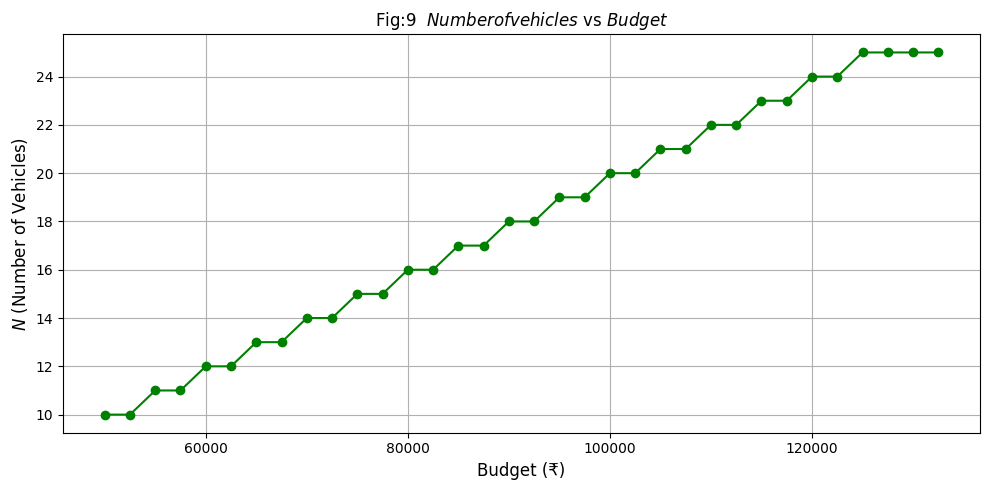

In [56]:

def plot_vehicles_vs_budget(budget_range, df_districts, area_id_to_name, ns_value=1, loc=1.0, fixed_patients=30,):
    vehicles_required = []
    budgets = []

    # Keep patient profile fixed
    new_data = create_fixed_patients(fixed_patients, area_id_to_name)

    for budget in budget_range:
        try:
            _, vehicles = total_rescuers_and_vehicles(ns_value, new_data, df_districts, loc, budget=budget,objective_type="none")
            vehicles_required.append(vehicles)
            budgets.append(budget)
            print(f"Budget ₹{budget} → {vehicles:.0f} vehicles")
        except Exception as e:
            print(f" Failed for budget ₹{budget}: {e}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(budgets, vehicles_required, marker='o', color='green')
    plt.title(r"Fig:9  $Number of vehicles$ vs $Budget$")
    plt.xlabel("Budget (₹)", fontsize=12)
    plt.ylabel(r"$N$ (Number of Vehicles)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig10", dpi=300, bbox_inches='tight')

    plt.show()

plot_vehicles_vs_budget(
    budget_range=range(50000, 135000, 2500),
    df_districts=df_districts,
    area_id_to_name=area_id_to_name,
    ns_value=1,
    loc=1.0,
    fixed_patients=20
)


 Budget ₹65000 → 65 rescuers
 Budget ₹67500 → 67 rescuers
 Budget ₹70000 → 70 rescuers
 Budget ₹72500 → 72 rescuers
 Budget ₹75000 → 75 rescuers
 Budget ₹77500 → 77 rescuers
 Budget ₹80000 → 80 rescuers
 Budget ₹82500 → 82 rescuers
 Budget ₹85000 → 85 rescuers
 Budget ₹87500 → 87 rescuers
 Budget ₹90000 → 90 rescuers
 Budget ₹92500 → 92 rescuers


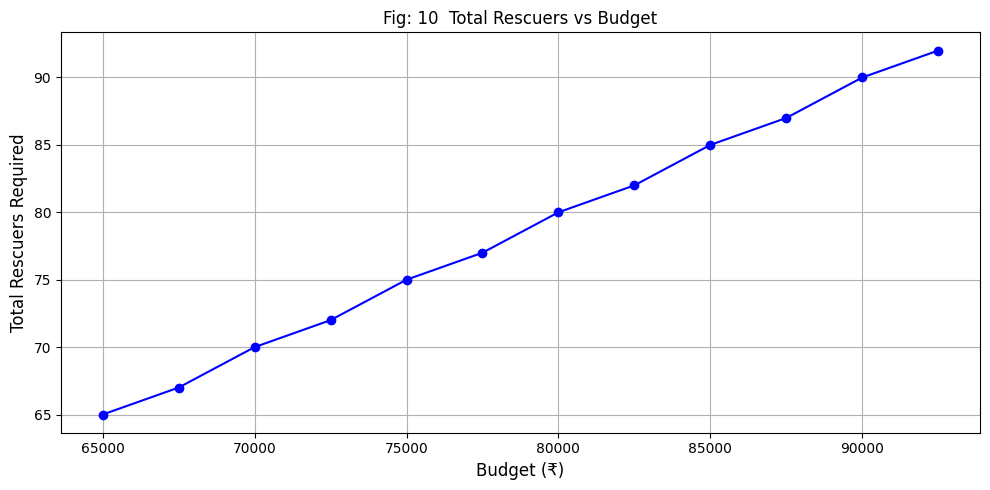

In [57]:

def plot_rescuers_vs_budget(
    budget_range, df_districts, area_id_to_name,
    ns_value=1, loc=1.0, fixed_patients=30):
    rescuers_required = []
    budgets = []

    new_data = create_fixed_patients(fixed_patients, area_id_to_name)

    for budget in budget_range:
        try:
            rescuers, _ = total_rescuers_and_vehicles(
                ns_value=ns_value,
                new_data=new_data,
                df_districts=df_districts,
                loc=loc,
                budget=budget,enforce_min_rescuers=True,objective_type="none"
            )
            rescuers_required.append(rescuers)
            budgets.append(budget)
            print(f" Budget ₹{budget} → {rescuers:.0f} rescuers")
        except Exception as e:
            print(f" Failed for budget ₹{budget}: {e}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(budgets, rescuers_required, marker='o', color='blue')
    plt.title("Fig: 10  Total Rescuers vs Budget")
    plt.xlabel("Budget (₹)", fontsize=12)
    plt.ylabel("Total Rescuers Required", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig9", dpi=300, bbox_inches='tight')

    plt.show()


plot_rescuers_vs_budget(
    budget_range=range(65000, 93000, 2500),
    df_districts=df_districts,
    area_id_to_name=area_id_to_name,
    ns_value=1,
    loc=1.0,
    fixed_patients=30
)


1 patients → 1 rescuers
2 patients → 2 rescuers
3 patients → 4 rescuers
4 patients → 6 rescuers
5 patients → 9 rescuers
6 patients → 11 rescuers
7 patients → 11 rescuers
8 patients → 14 rescuers
9 patients → 15 rescuers
10 patients → 19 rescuers


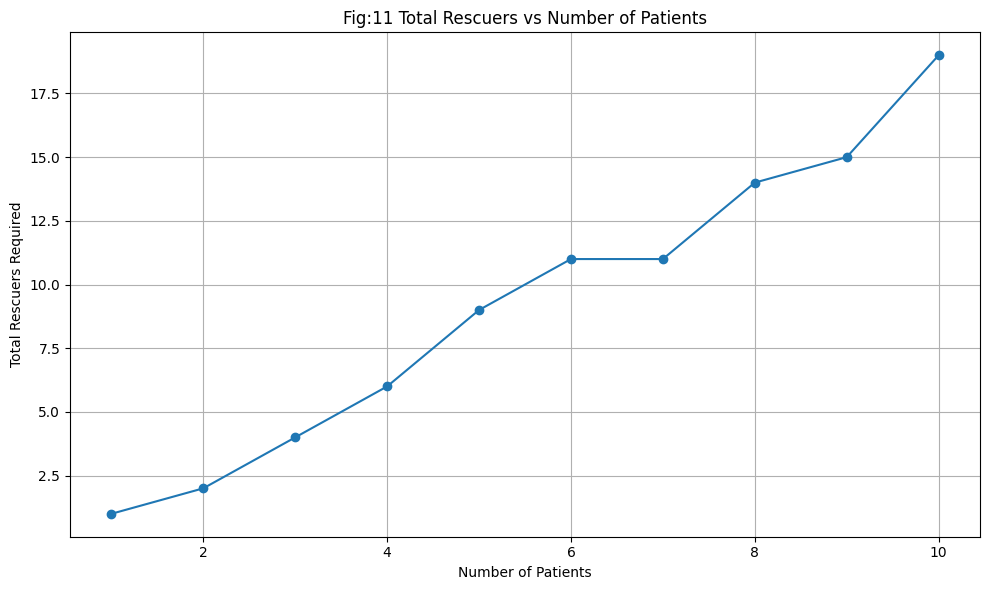

In [58]:

def plot_rescuers_vs_patients(patient_range, df_districts, dt_model, scaler, area_id_to_name, area_rank, ns_value=1, loc=1.0):
    rescuers_required = []
    patient_counts = []

    for n in patient_range:
        new_data = create_fixed_patients(n, area_id_to_name)  

        # Run the model to get total rescuers
        try:
            rescuers, _ = total_rescuers_and_vehicles(ns_value, new_data, df_districts, loc, budget=50000,objective_type="none")
            rescuers_required.append(rescuers)
            patient_counts.append(n)
            print(f"{n} patients → {rescuers:.0f} rescuers")
        except Exception as e:
            print(f"❌ Failed for {n} patients: {e}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(patient_counts, rescuers_required, marker='o', linestyle='-')
    plt.title("Fig:11 Total Rescuers vs Number of Patients")
    plt.xlabel("Number of Patients")
    plt.ylabel("Total Rescuers Required")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig11", dpi=300, bbox_inches='tight')

    plt.show()

# Call the plotting function
plot_rescuers_vs_patients(
    patient_range=range(1, 11, 1),
    df_districts=df_districts,
    dt_model=dt_model,
    scaler=scaler,
    area_id_to_name=area_id_to_name,
    area_rank=area_rank,
    ns_value=1,
    loc=1.0
)


In [59]:
import matplotlib.pyplot as plt

def plot_vehicles_vs_capacity(capacity_values, df_districts, area_id_to_name, ns_value=1, loc=1.0, fixed_patients=30, budget=100000):
    vehicle_counts = []
    capacities = []

    # Fixed patient input
    new_data = create_fixed_patients(fixed_patients, area_id_to_name)

    for cap in capacity_values:
        capacity_dict = {0: cap}  # Only one vehicle type

        try:
            _, total_vehicles = total_rescuers_and_vehicles(
                ns_value, new_data, df_districts, loc, budget,vehicle_cap=True,
                vehicle_capacity_dict=capacity_dict,objective_type="none"
            )
            vehicle_counts.append(total_vehicles)
            capacities.append(cap)
            print(f"Capacity {cap} → {total_vehicles:.0f} vehicles")
        except Exception as e:
            print(f"❌ Failed for capacity {cap}: {e}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(capacities, vehicle_counts, marker='o', linestyle='-', color='purple')
    plt.title("Fig: 12  Total Vehicles vs Vehicle Capacity")
    plt.xlabel("Vehicle Capacity")
    plt.ylabel("Total Vehicles Required")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig12", dpi=300, bbox_inches='tight')

    plt.show()


Capacity 2 → 20 vehicles
Capacity 3 → 15 vehicles
Capacity 4 → 12 vehicles
Capacity 5 → 11 vehicles
Capacity 6 → 10 vehicles


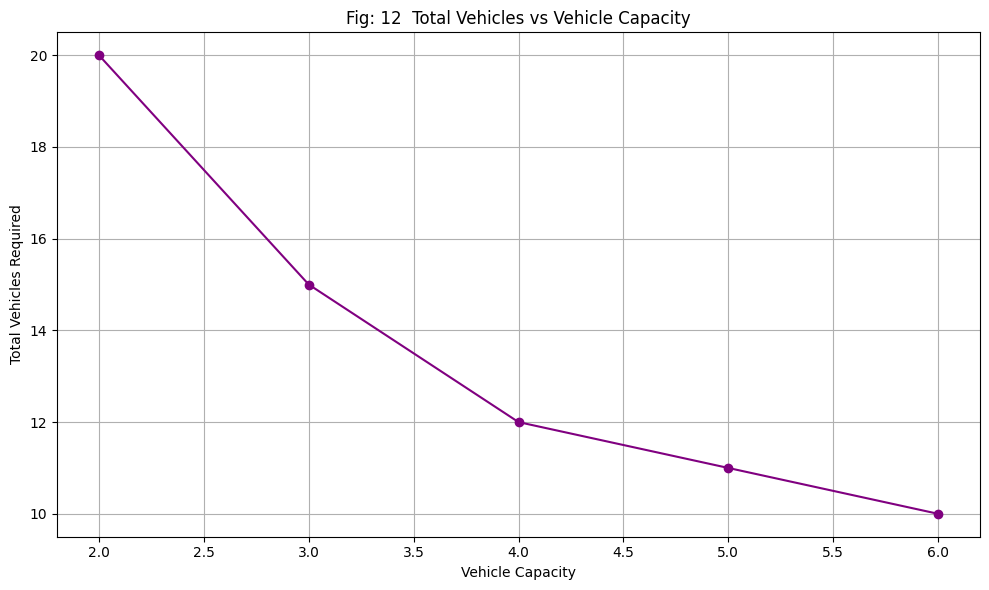

In [60]:
plot_vehicles_vs_capacity(
    capacity_values=range(2, 7),  # test for capacity = 1 to 5
    df_districts=df_districts,
    area_id_to_name=area_id_to_name,
    ns_value=1,
    loc=1.0,
    fixed_patients=30,
    budget=100000
)


In [61]:
import matplotlib.pyplot as plt

def plot_vehicles_vs_ns(ns_values, df_districts, area_id_to_name, fixed_patients=30, loc=1.0, budget=1e7):
    vehicle_counts = []
    rescuer_counts = []

    # Generate patient data once for fairness
    new_data = create_fixed_patients(fixed_patients, area_id_to_name)

    for ns in ns_values:
        try:
            _, total_vehicles = total_rescuers_and_vehicles(
                ns_value=ns,
                new_data=new_data,
                df_districts=df_districts,
                loc=loc,
                budget=budget,
                rescuer_capacity_require=True,
                vehicle_capacity_dict={0: 3},
                objective_type="none"
            )
            vehicle_counts.append(total_vehicles)
            print(f"Ns={ns} ➤ Vehicles={total_vehicles:.0f},")
        except Exception as e:
            print(f"❌ Failed for Ns={ns}: {e}")
            vehicle_counts.append(None)
            

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(ns_values, vehicle_counts, marker='o', label="Total Vehicles Used", color='teal')
    plt.title("Fig 13 : Vehicles vs Ns Value")
    plt.xlabel("Ns Value (Rescuers per Severity Level)")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("fig14", dpi=300, bbox_inches='tight')

    plt.show()


Ns=2 ➤ Vehicles=28,
Ns=3 ➤ Vehicles=31,
Ns=4 ➤ Vehicles=39,
Ns=5 ➤ Vehicles=45,


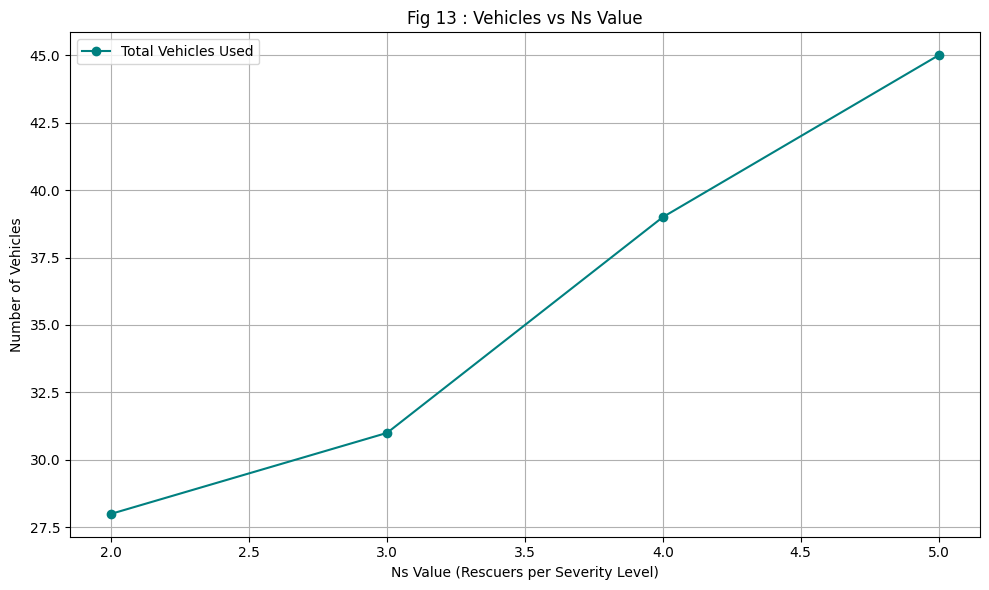

In [62]:
plot_vehicles_vs_ns(ns_values=range(2, 6), df_districts=df_districts, area_id_to_name=area_id_to_name, fixed_patients=20)


Running for vehicle capacity = 2
Running for vehicle capacity = 3
Running for vehicle capacity = 4
Running for vehicle capacity = 5
Running for vehicle capacity = 6
Running for vehicle capacity = 7
Running for vehicle capacity = 8
Running for vehicle capacity = 9
Running for vehicle capacity = 10


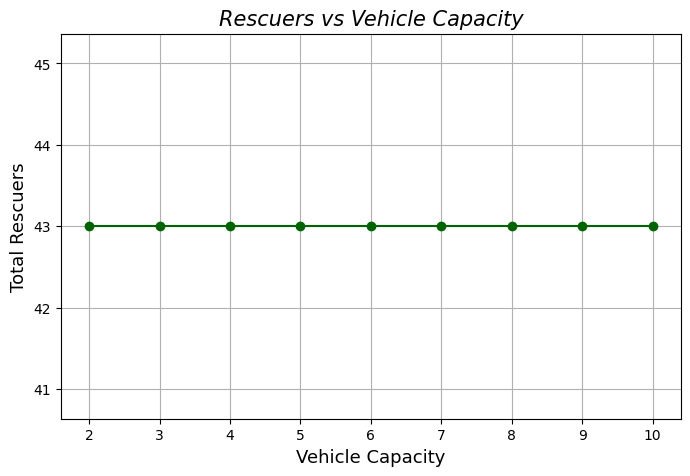

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
ns_value = 1
n_patients = 30
budget = 100000
capacity_range = range(2, 11)  # Vehicle capacity from 2 to 10

# Sample patient data
subset = new_data.sample(n=n_patients, random_state=42).reset_index(drop=True)

rescuer_results = []
vehicle_results = []

for cap in capacity_range:
    print(f"Running for vehicle capacity = {cap}")
    cap_dict = {0: cap}
    
    try:
        total_rescuers, total_vehicles = total_rescuers_and_vehicles(
            ns_value=ns_value,
            new_data=subset,
            df_districts=df_districts,
            loc=1,
            budget=budget,
            enforce_min_rescuers=False,
            vehicle_cap=False,
            rescuer_cap=False,  # 👈 Enforce inverse relation
            rescuer_capacity_require=False,
            vehicle_capacity_dict=cap_dict,
            objective_type="z2"
        )
    except RuntimeError as e:
        total_rescuers = float("nan")
        total_vehicles = float("nan")

    rescuer_results.append(total_rescuers)
    vehicle_results.append(total_vehicles)

# Create DataFrame
df = pd.DataFrame({
    "Vehicle_Capacity": list(capacity_range),
    "Total_Rescuers": rescuer_results,
    "Total_Vehicles": vehicle_results
})

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df["Vehicle_Capacity"], df["Total_Rescuers"], marker='o', color='darkgreen')
plt.xlabel("Vehicle Capacity", fontsize=13)
plt.ylabel("Total Rescuers", fontsize=13)
plt.title("Rescuers vs Vehicle Capacity", fontsize=15, fontstyle='italic')
plt.grid(True)
plt.show()
